<a href="https://colab.research.google.com/github/DavideRosatelli/Intrusion-Detection-System-Data-Poisoning/blob/main/Thesis_poisonlabel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import keras
import sklearn
import itertools
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")
y_multi_train = pd.read_csv("y_multi_train.csv")
y_multi_test = pd.read_csv("y_multi_test.csv")

In [3]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [4]:
#dictionaries for final plots
res_log=dict()
res_rf_b=dict()
res_xgb_b=dict()
res_nn_b=dict()
res_tree=dict()
res_rf_m=dict()
res_xgb_m=dict()
res_nn_m=dict()

15% label flipped

In [5]:
a, b = np.split(y_train, [int(.15*len(y_train))])
a = a.sample(frac=1, random_state=42)
y_train_mod1 = pd.concat([a, b], axis=0)
y_train_mod1

label
20656       1
10021       1
6725        1
18623       0
3027        0
...       ...
172625      0
172626      0
172627      1
172628      1
172629      1

[172630 rows x 1 columns]

In [6]:
a, b = np.split(y_multi_train, [int(.15*len(y_multi_train))])
a = a.sample(frac=1, random_state=42)
y_multi_train_mod1 = pd.concat([a, b], axis=0)
y_multi_train_mod1

attack_cat
20656            1
10021            5
6725             1
18623            0
3027             0
...            ...
172625           0
172626           0
172627           2
172628           1
172629           3

[172630 rows x 1 columns]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score on test: 0.8949169685280143
score on train: 0.8431037479001332
              precision    recall  f1-score   support

           0       0.96      0.74      0.84     30685
           1       0.87      0.98      0.92     54343

    accuracy                           0.89     85028
   macro avg       0.91      0.86      0.88     85028
weighted avg       0.90      0.89      0.89     85028



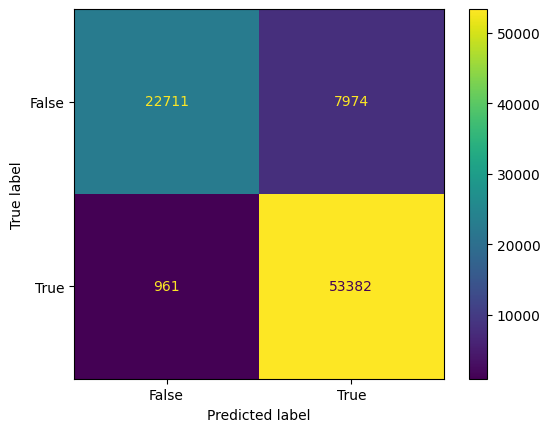

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)
lr1=LogisticRegression()
lr1.fit(X_train, y_train_mod1)
y_pred = lr1.predict(X_test)
print("score on test: " + str(lr1.score(X_test, y_test)))
print("score on train: "+ str(lr1.score(X_train, y_train_mod1)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_log['15%']=acc

AUC: 0.9621


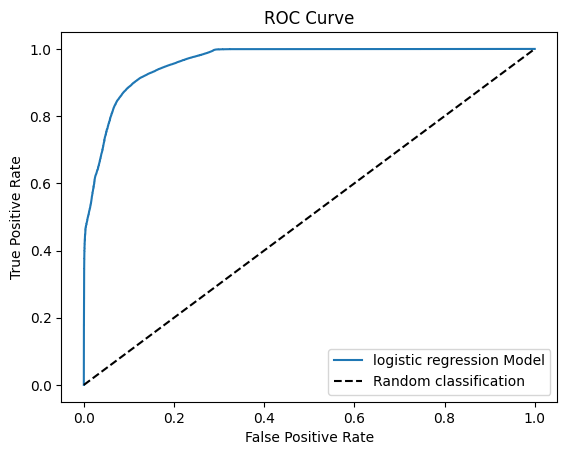

In [8]:
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.metrics import roc_curve
# ROC curve and AUC
lr1_predproba = lr1.predict_proba(X_test)[:, 1]
AUC_lr1 = roc_auc_score(y_test, lr1_predproba)
print(f'AUC: {AUC_lr1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, lr1_predproba)
plt.plot(fpr, tpr, label='logistic regression Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<ipython-input-9-6d20d432a98a>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train, y_train_mod1)


score on test: 0.9353859904972479
score on train: 0.8961014887331287
              precision    recall  f1-score   support

           0       0.94      0.88      0.91     30685
           1       0.93      0.97      0.95     54343

    accuracy                           0.94     85028
   macro avg       0.94      0.92      0.93     85028
weighted avg       0.94      0.94      0.93     85028



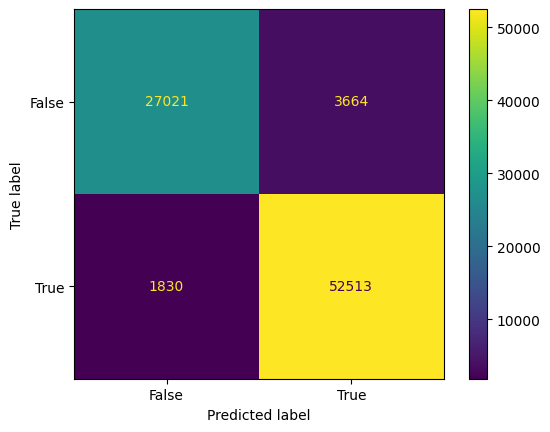

In [9]:
from sklearn.ensemble import RandomForestClassifier
import pickle
rf1 = RandomForestClassifier(n_estimators=30, max_depth=10)
rf1.fit(X_train, y_train_mod1)
y_pred = rf1.predict(X_test)
print("score on test: " + str(rf1.score(X_test, y_test)))
print("score on train: "+ str(rf1.score(X_train, y_train_mod1)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_rf_b['15%']=acc

AUC: 0.9855


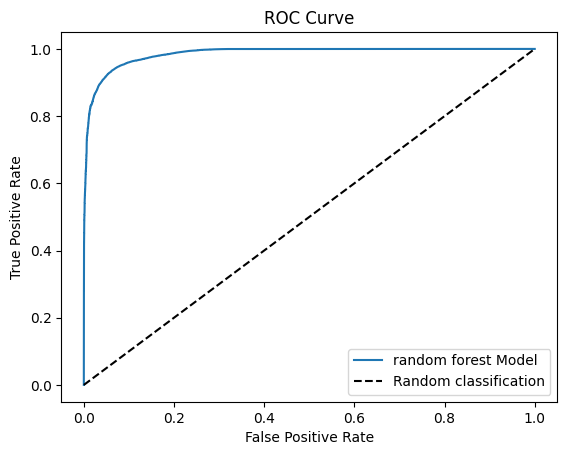

In [10]:
# ROC curve and AUC
rf1_predproba = rf1.predict_proba(X_test)[:, 1]
AUC_rf1 = roc_auc_score(y_test, rf1_predproba)
print(f'AUC: {AUC_rf1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, rf1_predproba)
plt.plot(fpr, tpr, label='random forest Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

score on test: 0.815190290257327
score on train: 0.9200428662457278
              precision    recall  f1-score   support

           0       0.93      0.53      0.67     30685
           1       0.79      0.98      0.87     54343

    accuracy                           0.82     85028
   macro avg       0.86      0.75      0.77     85028
weighted avg       0.84      0.82      0.80     85028



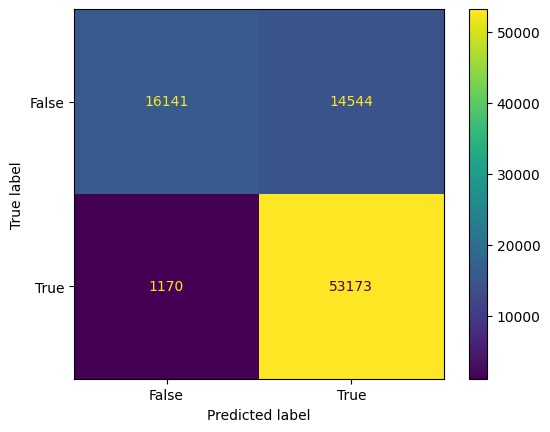

In [11]:
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt
xgb1 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb1.fit(X_train, y_train_mod1)
y_pred = xgb1.predict(X_test)
print("score on test: " + str(xgb1.score(X_test, y_test)))
print("score on train: "+ str(xgb1.score(X_train, y_train_mod1)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_xgb_b['15%']=acc

AUC: 0.9146


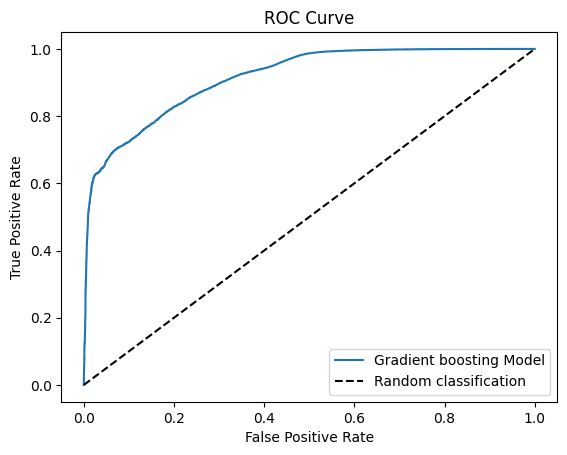

In [12]:
# ROC curve and AUC
xgb1_predproba = xgb1.predict_proba(X_test)[:, 1]
AUC_xgb1 = roc_auc_score(y_test, xgb1_predproba)
print(f'AUC: {AUC_xgb1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, xgb1_predproba)
plt.plot(fpr, tpr, label='Gradient boosting Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Epoch 1/100
1349/1349 [==============================] - 4s 2ms/step - loss: 0.3544 - accuracy: 0.8596
Epoch 2/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.3327 - accuracy: 0.8745
Epoch 3/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.3261 - accuracy: 0.8791
Epoch 4/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.3217 - accuracy: 0.8824
Epoch 5/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.3166 - accuracy: 0.8861
Epoch 6/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.3101 - accuracy: 0.8914
Epoch 7/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.3065 - accuracy: 0.8948
Epoch 8/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.3032 - accuracy: 0.8963
Epoch 9/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.3011 - accuracy: 0.8984
Epoch 10/100
1349/1349 [==============================] - 3s 2ms/step - l

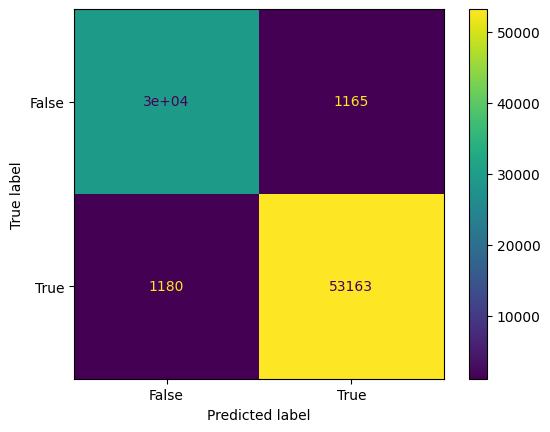

In [13]:
import keras
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import callbacks
from keras import metrics

model=models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(42,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)
model.fit(X_train, y_train_mod1, batch_size=128, epochs=100, callbacks=[earlystopping])

y_pred = model.predict(X_test)
print("score on test: " + str(model.evaluate(X_test,y_test)[1]))
print("score on train: "+ str(model.evaluate(X_train,y_train_mod1)[1]))

scores = model.evaluate(X_test, y_test, verbose=0)
res_nn_b['15%']=scores[1]
from sklearn import metrics
y_pred_mat = y_pred.round()
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [14]:
import numpy as np
y_true_int = y_test.values.ravel()
y_pred_int = y_pred.round().ravel().astype('int')
report = metrics.classification_report(y_true_int, y_pred_int)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     30685
           1       0.98      0.98      0.98     54343

    accuracy                           0.97     85028
   macro avg       0.97      0.97      0.97     85028
weighted avg       0.97      0.97      0.97     85028



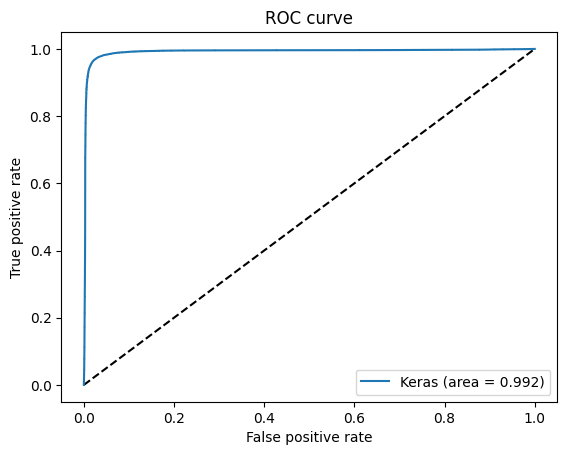

In [15]:
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [16]:
attack_cat=['Normal', 'Generic', 'Exploits', 'Fuzzers', 'DoS', 'Reconnaissance', 'Analysis', 'Backdoor', 'Shellcode', 'Worms']
import numpy as np
import itertools
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

score on test: 0.4357035329538505
score on train: 0.7339222614840989
              precision    recall  f1-score   support

           0       0.84      0.66      0.74     30685
           1       0.47      0.00      0.00     19493
           2       0.43      0.82      0.57     14798
           3       0.51      0.43      0.47      7903
           4       0.04      0.05      0.05      5312
           5       0.20      0.16      0.18      4653
           6       0.00      0.02      0.00       850
           7       0.00      0.00      0.00       771
           8       0.03      0.14      0.05       509
           9       0.90      0.17      0.28        54

    accuracy                           0.44     85028
   macro avg       0.34      0.25      0.23     85028
weighted avg       0.55      0.44      0.42     85028



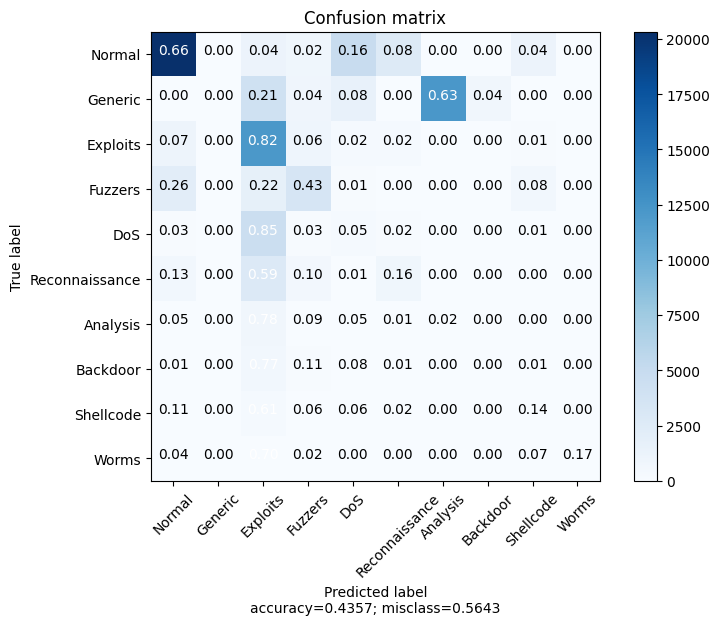

In [17]:
from sklearn.tree import DecisionTreeClassifier
dtree1 = DecisionTreeClassifier(max_depth = 10).fit(X_train, y_multi_train_mod1)
y_pred = dtree1.predict(X_test)
print("score on test: " + str(dtree1.score(X_test, y_multi_test)))
print("score on train: "+ str(dtree1.score(X_train, y_multi_train_mod1)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_tree['15%']=acc

In [18]:
import yellowbrick
from yellowbrick.classifier import ROCAUC

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):
    # Creating visualization
    visualizer = ROCAUC(model)
    # Fitting to the training data first then scoring with the test data
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    return visualizer

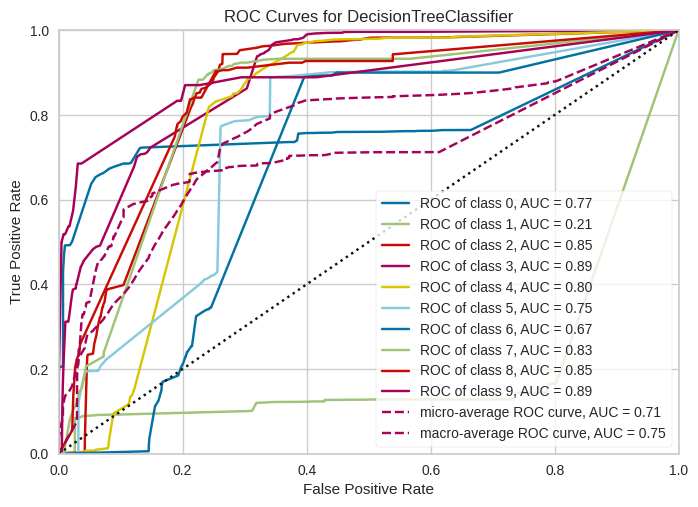

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=DecisionTreeClassifier(max_depth=10))

In [19]:
plot_ROC_curve(dtree1, X_train, y_multi_train_mod1, X_test, y_multi_test)

<ipython-input-20-772d5696187c>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train, y_multi_train_mod1)


score on test: 0.8060050806793057
score on train: 0.7420842263801193
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     30685
           1       1.00      0.96      0.98     19493
           2       0.56      0.93      0.70     14798
           3       0.75      0.50      0.60      7903
           4       0.57      0.01      0.02      5312
           5       0.94      0.50      0.65      4653
           6       0.00      0.00      0.00       850
           7       0.00      0.00      0.00       771
           8       0.00      0.00      0.00       509
           9       0.00      0.00      0.00        54

    accuracy                           0.81     85028
   macro avg       0.47      0.39      0.39     85028
weighted avg       0.80      0.81      0.77     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


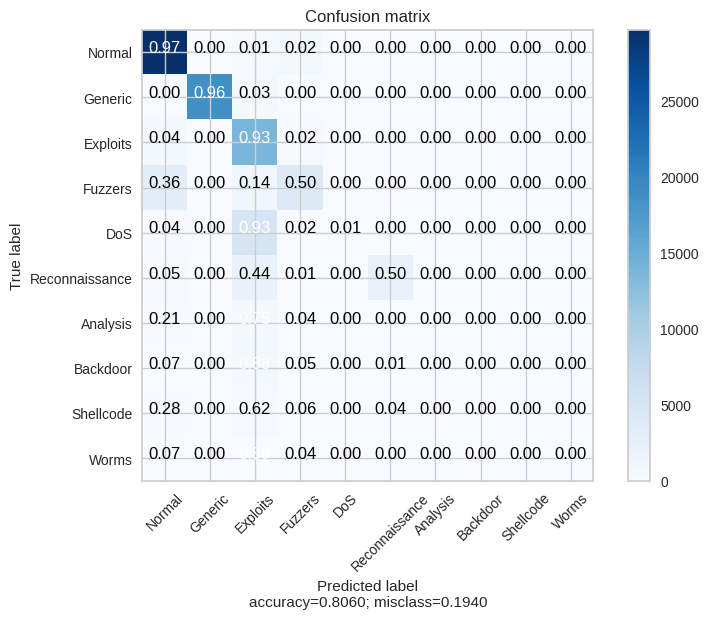

In [20]:
rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train, y_multi_train_mod1)
y_pred = rf2.predict(X_test)
print("score on test: " + str(rf2.score(X_test, y_multi_test)))
print("score on train: "+ str(rf2.score(X_train, y_multi_train_mod1)))
print(metrics.classification_report(y_multi_test, y_pred))
accuracy = rf2.score(X_test, y_multi_test)
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_rf_m['15%']=acc

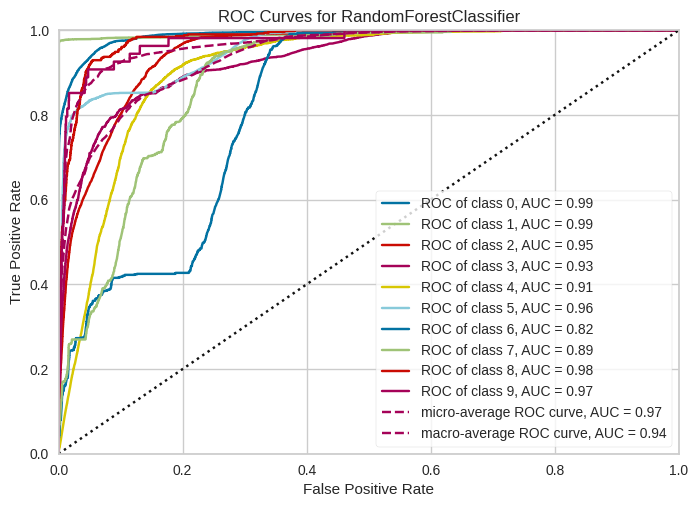

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=RandomForestClassifier(max_depth=10, n_estimators=30))

In [21]:
plot_ROC_curve(rf2, X_train, y_multi_train_mod1, X_test, y_multi_test)

score on test: 0.5429623182951498
score on train: 0.790963331981695
              precision    recall  f1-score   support

           0       0.90      0.64      0.75     30685
           1       0.65      0.27      0.38     19493
           2       0.35      0.83      0.50     14798
           3       0.69      0.68      0.69      7903
           4       0.06      0.09      0.07      5312
           5       0.86      0.63      0.73      4653
           6       0.28      0.04      0.07       850
           7       0.03      0.01      0.02       771
           8       0.64      0.32      0.43       509
           9       0.33      0.07      0.12        54

    accuracy                           0.54     85028
   macro avg       0.48      0.36      0.37     85028
weighted avg       0.66      0.54      0.55     85028



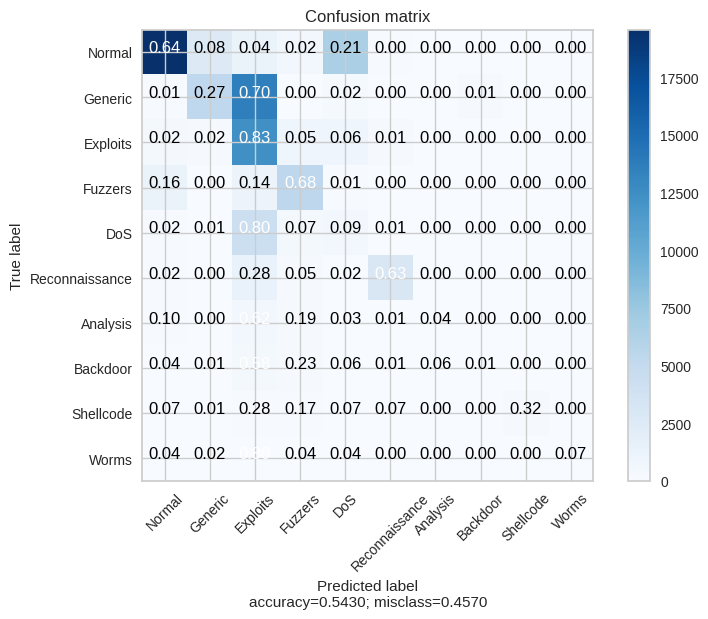

In [22]:
xgb2 = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb2.fit(X_train, y_multi_train_mod1)
y_pred = xgb2.predict(X_test)
print("score on test: " + str(xgb2.score(X_test, y_multi_test)))
print("score on train: "+ str(xgb2.score(X_train, y_multi_train_mod1)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_xgb_m['15%']=acc

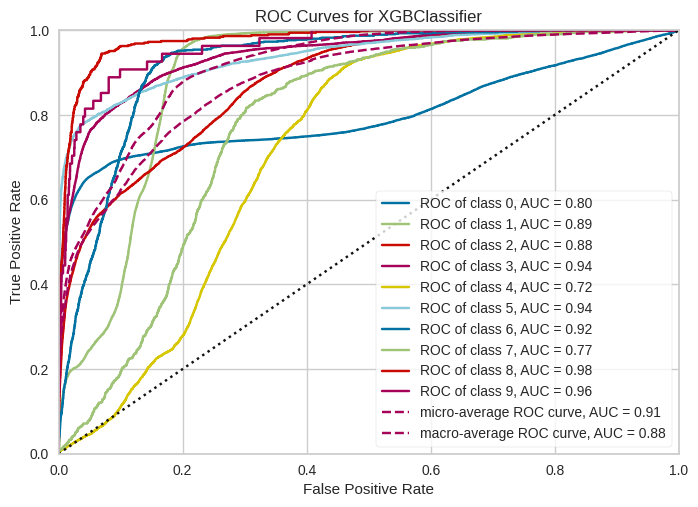

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, g...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))

In [23]:
plot_ROC_curve(xgb2, X_train, y_multi_train_mod1, X_test, y_multi_test)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               5504      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 18,570
Trainable params: 18,570
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1349/1349 [==============================] - 4s 2ms/step - loss: 1.0204 - accuracy: 0.6754
Epoch 2/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.

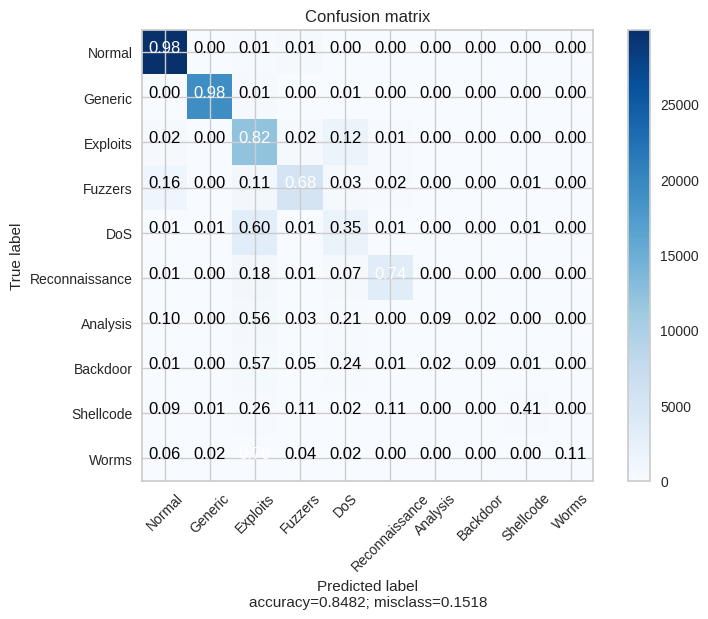

In [24]:
from keras import metrics
model2 = models.Sequential()
model2.add(layers.Dense(128, input_shape = (42,), activation = "relu"))
model2.add(layers.Dense(64, activation = "relu"))
model2.add(layers.Dense(64,activation="relu"))
model2.add(layers.Dense(10, activation = "softmax"))
model2.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics = ["accuracy"])
model2.summary()

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)

model2.fit(X_train,y_multi_train_mod1,epochs=100,batch_size=128,callbacks=[earlystopping])
y_pred_arr = model2.predict(X_test)
y_pred = []

y_pred = np.argmax(y_pred_arr, axis=1)
print("score on test: " + str(model2.evaluate(X_test,y_multi_test)[1]))
print("score on train: "+ str(model2.evaluate(X_train,y_multi_train_mod1)[1]))
scores = model2.evaluate(X_test, y_multi_test, verbose=0)
res_nn_m['15%']=scores[1]
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)

In [25]:
y_true_int = y_multi_test.values.ravel()
y_pred_int = y_pred.copy()
report = sklearn.metrics.classification_report(y_true_int, y_pred_int)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     30685
           1       0.99      0.98      0.99     19493
           2       0.65      0.82      0.73     14798
           3       0.85      0.68      0.75      7903
           4       0.39      0.35      0.37      5312
           5       0.87      0.74      0.80      4653
           6       0.80      0.09      0.16       850
           7       0.64      0.09      0.16       771
           8       0.56      0.41      0.47       509
           9       0.23      0.11      0.15        54

    accuracy                           0.85     85028
   macro avg       0.69      0.52      0.55     85028
weighted avg       0.85      0.85      0.84     85028



ROC AUC score: 0.9557359504627257


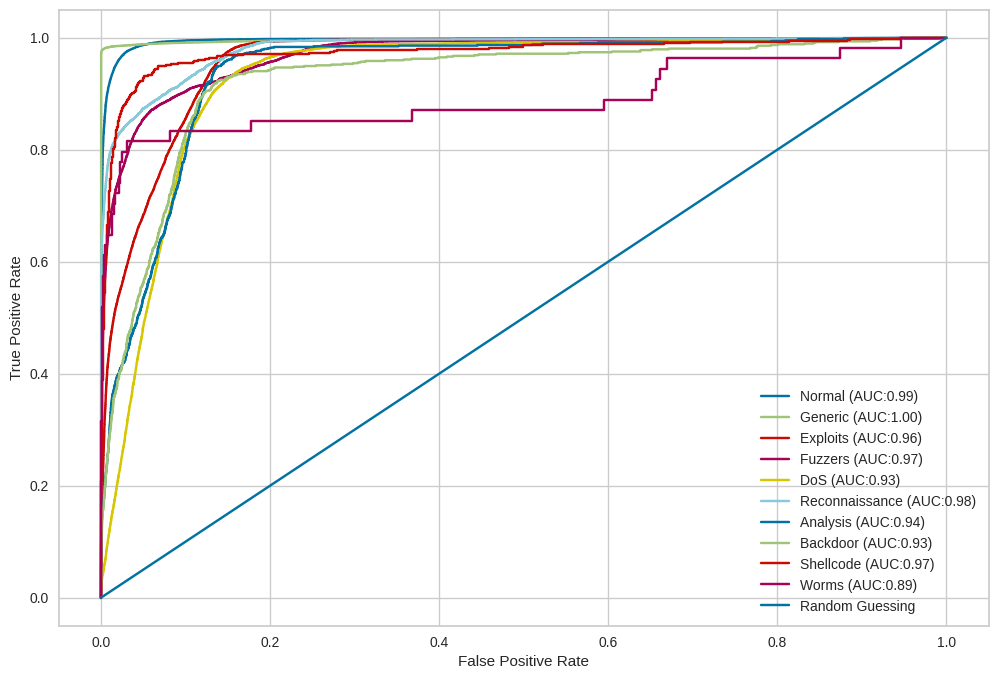

In [26]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
from sklearn.preprocessing import LabelBinarizer

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)

    for (idx, c_label) in enumerate(attack_cat):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_multi_test, y_pred_arr))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

30% label flipped

In [27]:
a, b = np.split(y_train, [int(.3*len(y_train))])
a = a.sample(frac=1, random_state=42)
y_train_mod2 = pd.concat([a, b], axis=0)
y_train_mod2

label
19959       1
46428       1
18670       0
41070       0
39584       1
...       ...
172625      0
172626      0
172627      1
172628      1
172629      1

[172630 rows x 1 columns]

In [28]:
a, b = np.split(y_multi_train, [int(.3*len(y_multi_train))])
a = a.sample(frac=1, random_state=42)
y_multi_train_mod2 = pd.concat([a, b], axis=0)
y_multi_train_mod2

attack_cat
19959            1
46428            5
18670            0
41070            0
39584            3
...            ...
172625           0
172626           0
172627           2
172628           1
172629           3

[172630 rows x 1 columns]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score on test: 0.8925883238462624
score on train: 0.7936164050280947
              precision    recall  f1-score   support

           0       0.98      0.72      0.83     30685
           1       0.86      0.99      0.92     54343

    accuracy                           0.89     85028
   macro avg       0.92      0.85      0.88     85028
weighted avg       0.90      0.89      0.89     85028



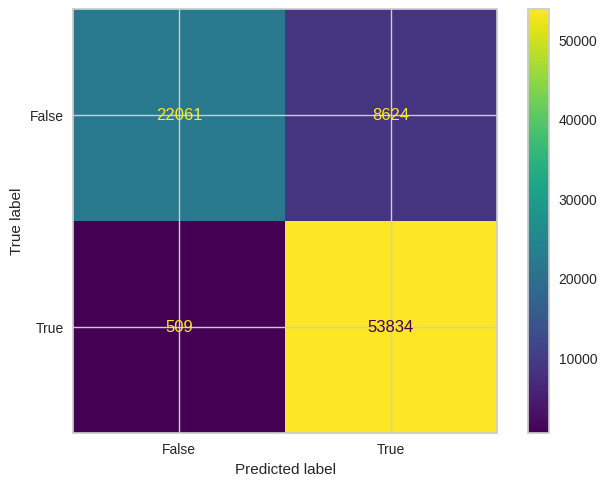

In [29]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)
lr1=LogisticRegression()
lr1.fit(X_train, y_train_mod2)
y_pred = lr1.predict(X_test)
print("score on test: " + str(lr1.score(X_test, y_test)))
print("score on train: "+ str(lr1.score(X_train, y_train_mod2)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_log['30%']=acc

AUC: 0.9612


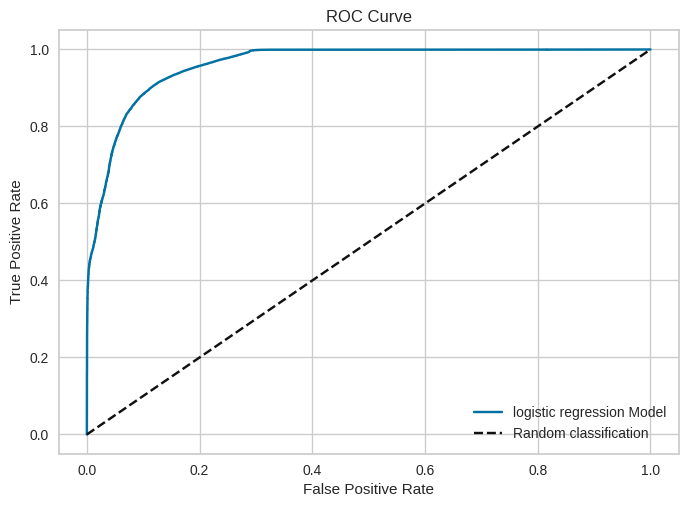

In [30]:
# ROC curve and AUC
lr1_predproba = lr1.predict_proba(X_test)[:, 1]
AUC_lr1 = roc_auc_score(y_test, lr1_predproba)
print(f'AUC: {AUC_lr1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, lr1_predproba)
plt.plot(fpr, tpr, label='logistic regression Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<ipython-input-31-8778a8c18b90>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train, y_train_mod2)


score on test: 0.9431010961095169
score on train: 0.8354341655563923
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     30685
           1       0.93      0.98      0.96     54343

    accuracy                           0.94     85028
   macro avg       0.95      0.93      0.94     85028
weighted avg       0.94      0.94      0.94     85028



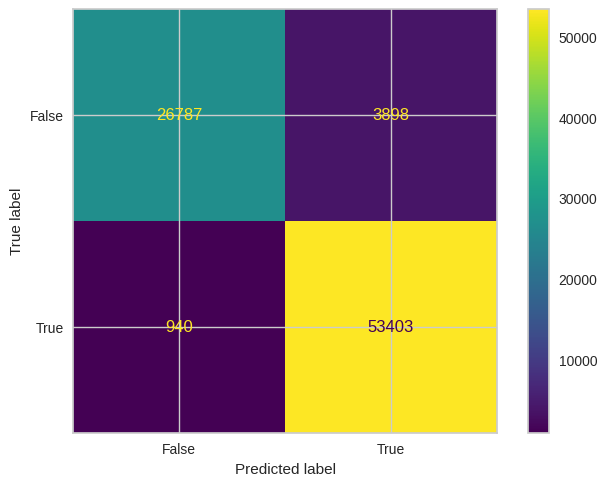

In [31]:
rf1 = RandomForestClassifier(n_estimators=30, max_depth=10)
rf1.fit(X_train, y_train_mod2)
y_pred = rf1.predict(X_test)
print("score on test: " + str(rf1.score(X_test, y_test)))
print("score on train: "+ str(rf1.score(X_train, y_train_mod2)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_rf_b['30%']=acc

AUC: 0.9895


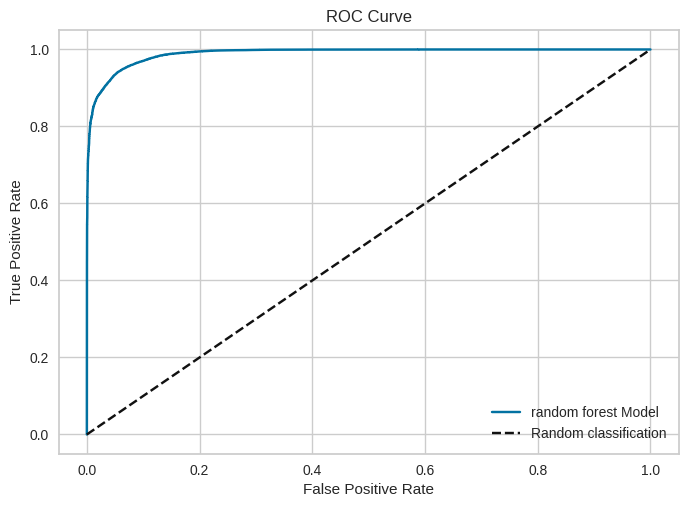

In [32]:
rf1_predproba = rf1.predict_proba(X_test)[:, 1]
AUC_rf1 = roc_auc_score(y_test, rf1_predproba)
print(f'AUC: {AUC_rf1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, rf1_predproba)
plt.plot(fpr, tpr, label='random forest Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

score on test: 0.815778331843628
score on train: 0.8536059781034583
              precision    recall  f1-score   support

           0       0.93      0.53      0.67     30685
           1       0.79      0.98      0.87     54343

    accuracy                           0.82     85028
   macro avg       0.86      0.75      0.77     85028
weighted avg       0.84      0.82      0.80     85028



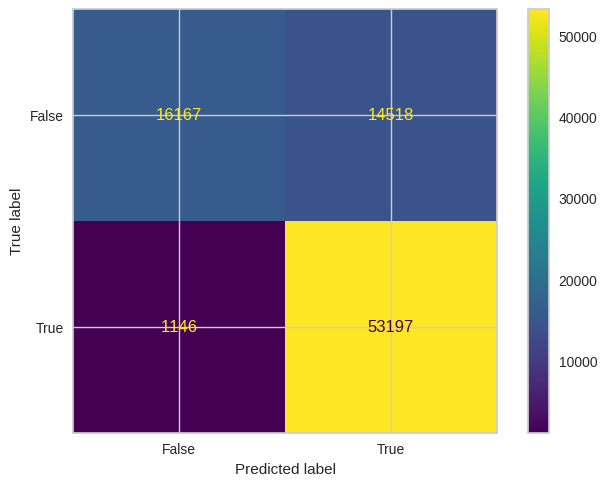

In [33]:
xgb1 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb1.fit(X_train, y_train_mod2)
y_pred = xgb1.predict(X_test)
print("score on test: " + str(xgb1.score(X_test, y_test)))
print("score on train: "+ str(xgb1.score(X_train, y_train_mod2)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_xgb_b['30%']=acc

AUC: 0.9083


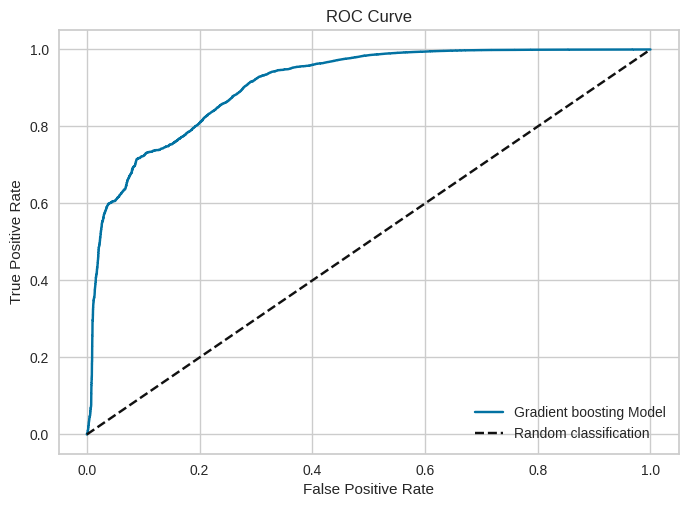

In [34]:
# ROC curve and AUC
xgb1_predproba = xgb1.predict_proba(X_test)[:, 1]
AUC_xgb1 = roc_auc_score(y_test, xgb1_predproba)
print(f'AUC: {AUC_xgb1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, xgb1_predproba)
plt.plot(fpr, tpr, label='Gradient boosting Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Epoch 1/100
1349/1349 [==============================] - 4s 2ms/step - loss: 0.4658 - accuracy: 0.8023
Epoch 2/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.4490 - accuracy: 0.8148
Epoch 3/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.4447 - accuracy: 0.8188
Epoch 4/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.4417 - accuracy: 0.8215
Epoch 5/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.4394 - accuracy: 0.8233
Epoch 6/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.4373 - accuracy: 0.8253
Epoch 7/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.4341 - accuracy: 0.8287
Epoch 8/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.4317 - accuracy: 0.8319
Epoch 9/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.4295 - accuracy: 0.8331
Epoch 10/100
1349/1349 [==============================] - 3s 2ms/step - l

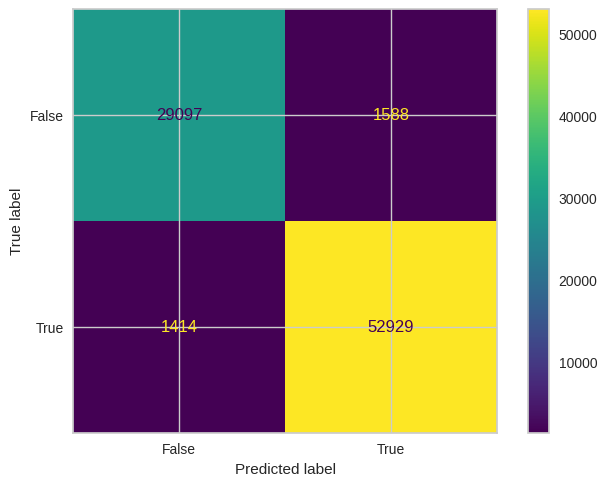

In [35]:
model=models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(42,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)
model.fit(X_train, y_train_mod2, batch_size=128, epochs=100, callbacks=[earlystopping])

y_pred = model.predict(X_test)
print("score on test: " + str(model.evaluate(X_test,y_test)[1]))
print("score on train: "+ str(model.evaluate(X_train,y_train_mod2)[1]))

scores = model.evaluate(X_test, y_test, verbose=0)
res_nn_b['30%']=scores[1]
from sklearn import metrics
y_pred_mat = y_pred.round()
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [36]:
y_true_int = y_test.values.ravel()
y_pred_int = y_pred.round().ravel().astype('int')
report = metrics.classification_report(y_true_int, y_pred_int)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     30685
           1       0.97      0.97      0.97     54343

    accuracy                           0.96     85028
   macro avg       0.96      0.96      0.96     85028
weighted avg       0.96      0.96      0.96     85028



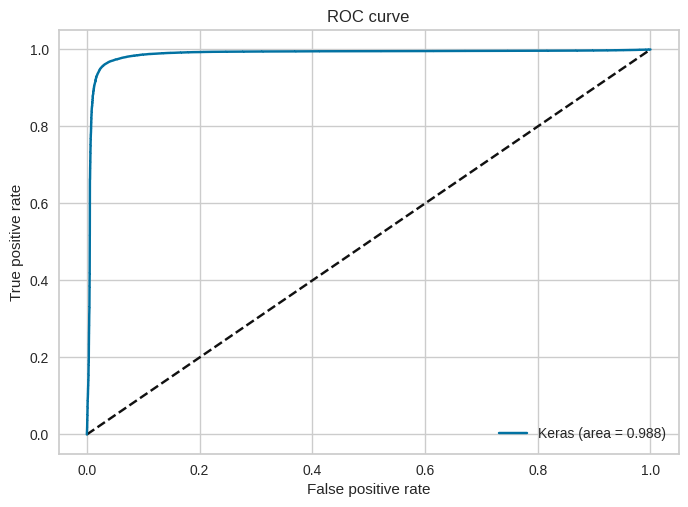

In [37]:
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

score on test: 0.4013971868090511
score on train: 0.6484330649365695
              precision    recall  f1-score   support

           0       0.79      0.55      0.65     30685
           1       0.14      0.00      0.00     19493
           2       0.32      0.83      0.47     14798
           3       0.45      0.48      0.46      7903
           4       0.01      0.02      0.01      5312
           5       0.72      0.17      0.27      4653
           6       0.41      0.05      0.09       850
           7       0.00      0.00      0.00       771
           8       0.36      0.09      0.15       509
           9       0.00      0.00      0.00        54

    accuracy                           0.40     85028
   macro avg       0.32      0.22      0.21     85028
weighted avg       0.46      0.40      0.38     85028



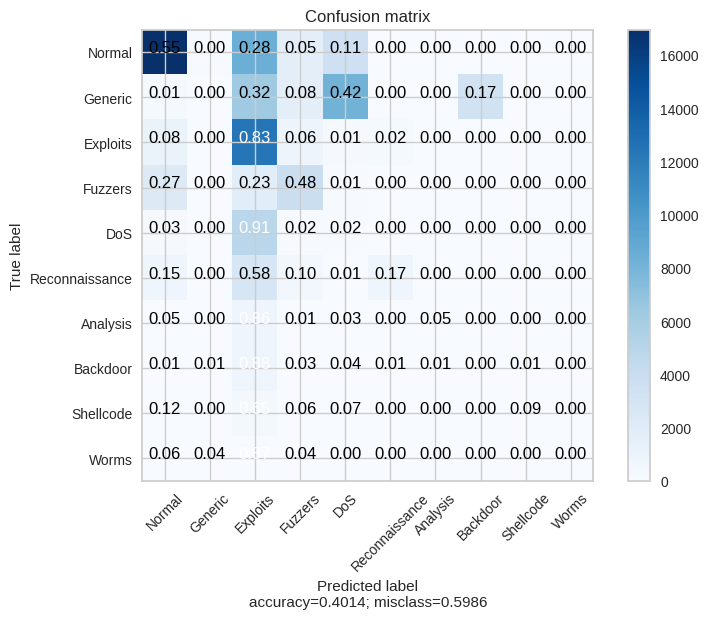

In [38]:
dtree1 = DecisionTreeClassifier(max_depth = 10).fit(X_train, y_multi_train_mod2)
y_pred = dtree1.predict(X_test)
print("score on test: " + str(dtree1.score(X_test, y_multi_test)))
print("score on train: "+ str(dtree1.score(X_train, y_multi_train_mod2)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_tree['30%']=acc

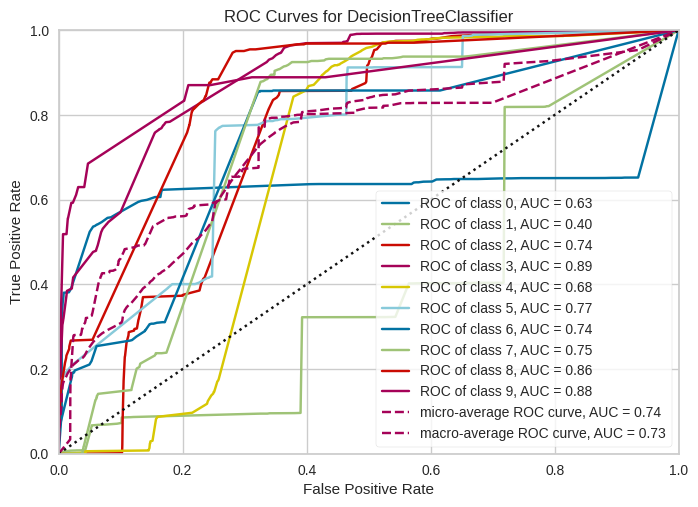

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=DecisionTreeClassifier(max_depth=10))

In [39]:
plot_ROC_curve(dtree1, X_train, y_multi_train_mod2, X_test, y_multi_test)

<ipython-input-40-a517557e8012>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train, y_multi_train_mod2)


score on test: 0.7578444747612552
score on train: 0.6552569078375717
              precision    recall  f1-score   support

           0       0.74      0.98      0.84     30685
           1       1.00      0.90      0.95     19493
           2       0.63      0.72      0.67     14798
           3       0.46      0.37      0.41      7903
           4       0.82      0.01      0.02      5312
           5       0.91      0.69      0.78      4653
           6       0.00      0.00      0.00       850
           7       0.00      0.00      0.00       771
           8       0.88      0.01      0.03       509
           9       0.00      0.00      0.00        54

    accuracy                           0.76     85028
   macro avg       0.54      0.37      0.37     85028
weighted avg       0.75      0.76      0.72     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


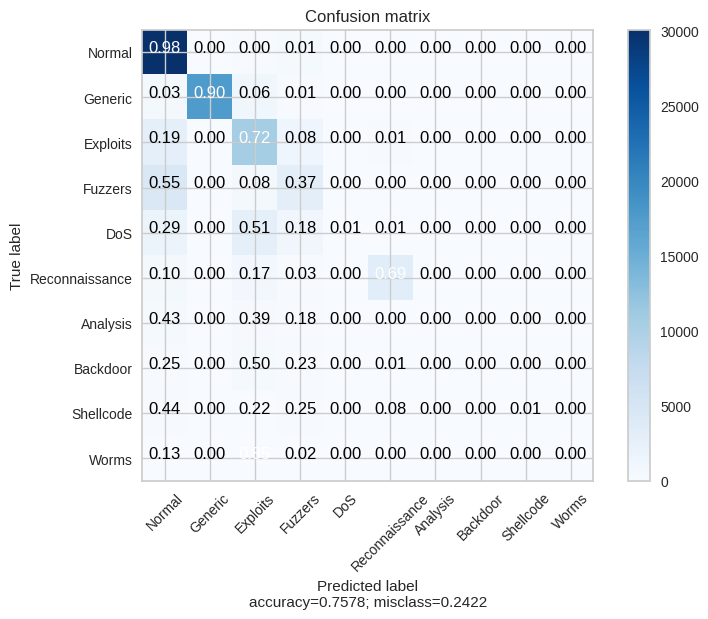

In [40]:
rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train, y_multi_train_mod2)
y_pred = rf2.predict(X_test)
print("score on test: " + str(rf2.score(X_test, y_multi_test)))
print("score on train: "+ str(rf2.score(X_train, y_multi_train_mod2)))
print(metrics.classification_report(y_multi_test, y_pred))
accuracy = rf2.score(X_test, y_multi_test)
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_rf_m['30%']=acc

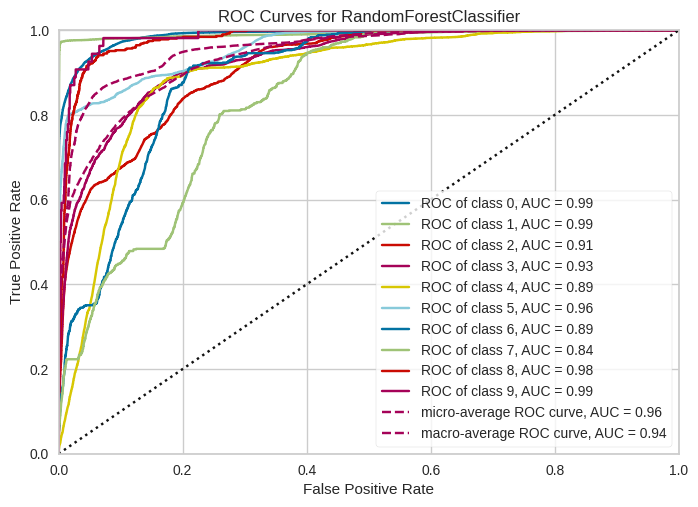

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=RandomForestClassifier(max_depth=10, n_estimators=30))

In [41]:
plot_ROC_curve(rf2, X_train, y_multi_train_mod2, X_test, y_multi_test)

score on test: 0.49521334148751
score on train: 0.6934773793662747
              precision    recall  f1-score   support

           0       0.86      0.70      0.77     30685
           1       0.22      0.01      0.01     19493
           2       0.28      0.85      0.42     14798
           3       0.64      0.62      0.63      7903
           4       0.07      0.04      0.05      5312
           5       0.85      0.59      0.70      4653
           6       0.41      0.03      0.06       850
           7       0.95      0.05      0.09       771
           8       0.66      0.31      0.43       509
           9       1.00      0.04      0.07        54

    accuracy                           0.50     85028
   macro avg       0.59      0.32      0.32     85028
weighted avg       0.54      0.50      0.46     85028



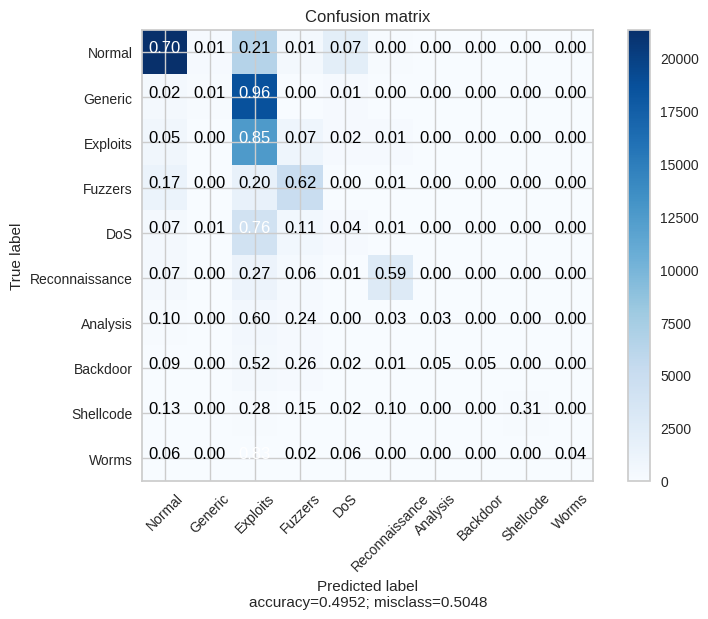

In [42]:
xgb2 = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb2.fit(X_train, y_multi_train_mod2)
y_pred = xgb2.predict(X_test)
print("score on test: " + str(xgb2.score(X_test, y_multi_test)))
print("score on train: "+ str(xgb2.score(X_train, y_multi_train_mod2)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_xgb_m['30%']=acc

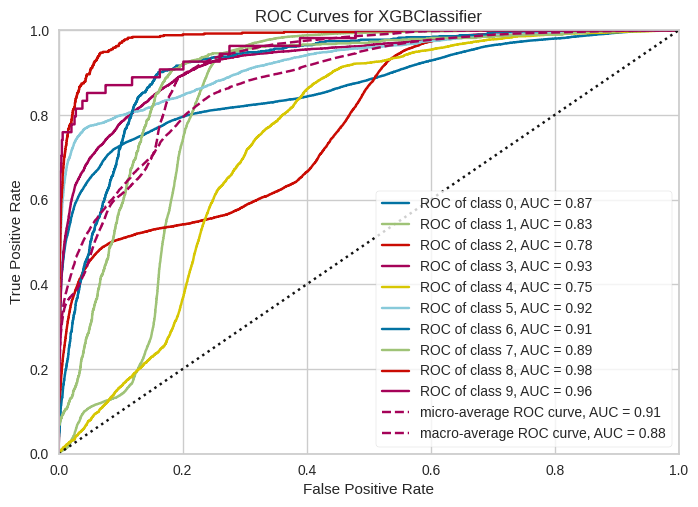

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, g...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))

In [43]:
plot_ROC_curve(xgb2, X_train, y_multi_train_mod2, X_test, y_multi_test)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               5504      
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 10)                650       
                                                                 
Total params: 18,570
Trainable params: 18,570
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1349/1349 [==============================] - 4s 2ms/step - loss: 1.2600 - accuracy: 0.5945
Epoch 2/100
1349/1349 [==============================] - 3s 2ms/step - loss: 1.

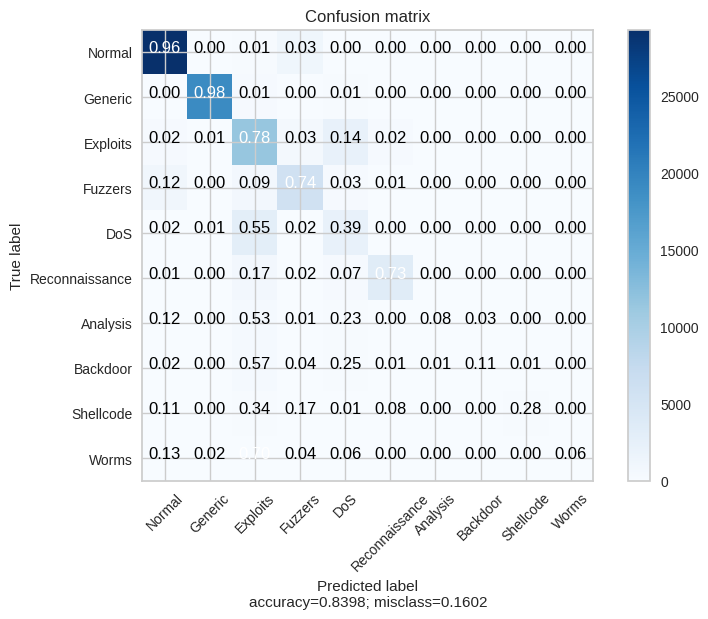

In [44]:
model2 = models.Sequential()
model2.add(layers.Dense(128, input_shape = (42,), activation = "relu"))
model2.add(layers.Dense(64, activation = "relu"))
model2.add(layers.Dense(64,activation="relu"))
model2.add(layers.Dense(10, activation = "softmax"))
model2.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics = ["accuracy"])
model2.summary()

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)

model2.fit(X_train,y_multi_train_mod2,epochs=100,batch_size=128,callbacks=[earlystopping])
y_pred_arr = model2.predict(X_test)
y_pred = np.argmax(y_pred_arr, axis=1)

scores=model2.evaluate(X_test, y_multi_test, verbose=0)
res_nn_m['30%']=scores[1]
print("score on test: " + str(model2.evaluate(X_test,y_multi_test)[1]))
print("score on train: "+ str(model2.evaluate(X_train,y_multi_train_mod2)[1]))
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)

In [45]:
y_true_int = y_multi_test.values.ravel()
y_pred_int = y_pred.copy()
report = metrics.classification_report(y_true_int, y_pred_int)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     30685
           1       0.99      0.98      0.98     19493
           2       0.66      0.78      0.71     14798
           3       0.75      0.74      0.74      7903
           4       0.39      0.39      0.39      5312
           5       0.86      0.73      0.79      4653
           6       0.74      0.08      0.14       850
           7       0.51      0.11      0.17       771
           8       0.60      0.28      0.39       509
           9       0.60      0.06      0.10        54

    accuracy                           0.84     85028
   macro avg       0.71      0.51      0.54     85028
weighted avg       0.84      0.84      0.84     85028



ROC AUC score: 0.9497127724024944


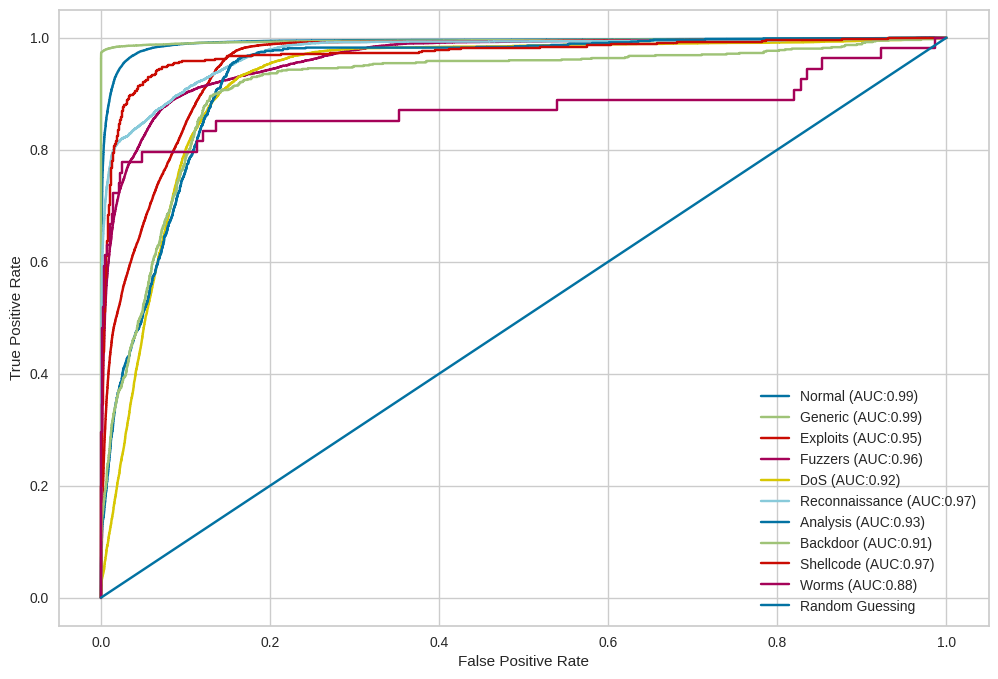

In [46]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
print('ROC AUC score:', multiclass_roc_auc_score(y_multi_test, y_pred_arr))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

45% label flipped

In [47]:
a, b = np.split(y_train, [int(.45*len(y_train))])
a = a.sample(frac=1, random_state=42)
y_train_mod3 = pd.concat([a, b], axis=0)
y_train_mod3

label
74293       0
8247        1
60577       0
47773       1
36340       1
...       ...
172625      0
172626      0
172627      1
172628      1
172629      1

[172630 rows x 1 columns]

In [48]:
a, b = np.split(y_multi_train, [int(.45*len(y_multi_train))])
a = a.sample(frac=1, random_state=42)
y_multi_train_mod3 = pd.concat([a, b], axis=0)
y_multi_train_mod3

attack_cat
74293            0
8247             3
60577            0
47773            5
36340            1
...            ...
172625           0
172626           0
172627           2
172628           1
172629           3

[172630 rows x 1 columns]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score on test: 0.8920355647551395
score on train: 0.7447199212187916
              precision    recall  f1-score   support

           0       0.98      0.71      0.83     30685
           1       0.86      0.99      0.92     54343

    accuracy                           0.89     85028
   macro avg       0.92      0.85      0.87     85028
weighted avg       0.90      0.89      0.89     85028



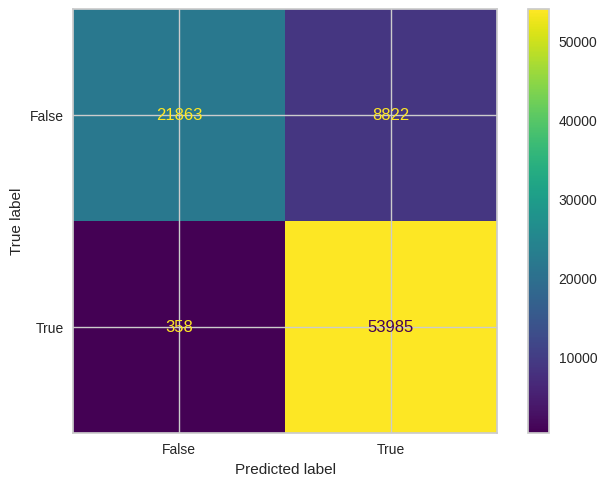

In [49]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)
lr1=LogisticRegression()
lr1.fit(X_train, y_train_mod3)
y_pred = lr1.predict(X_test)
print("score on test: " + str(lr1.score(X_test, y_test)))
print("score on train: "+ str(lr1.score(X_train, y_train_mod3)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_log['45%']=acc

AUC: 0.9602


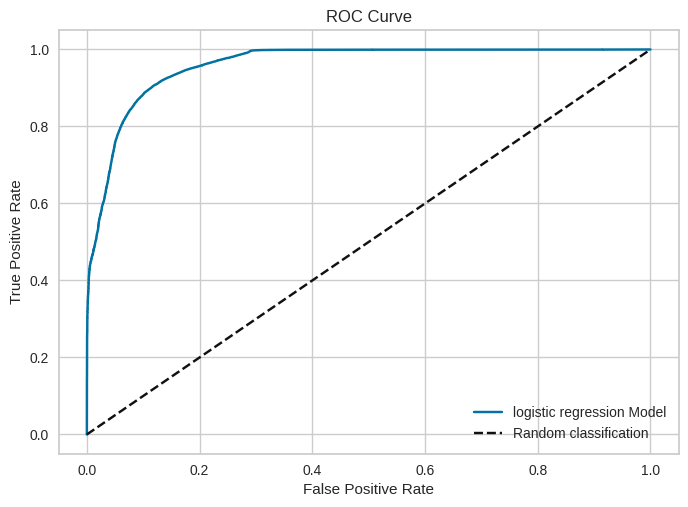

In [50]:
# ROC curve and AUC
lr1_predproba = lr1.predict_proba(X_test)[:, 1]
AUC_lr1 = roc_auc_score(y_test, lr1_predproba)
print(f'AUC: {AUC_lr1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, lr1_predproba)
plt.plot(fpr, tpr, label='logistic regression Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<ipython-input-51-a93217f62095>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train, y_train_mod3)


score on test: 0.9329279766665098
score on train: 0.7697503330823148
              precision    recall  f1-score   support

           0       0.96      0.85      0.90     30685
           1       0.92      0.98      0.95     54343

    accuracy                           0.93     85028
   macro avg       0.94      0.92      0.93     85028
weighted avg       0.93      0.93      0.93     85028



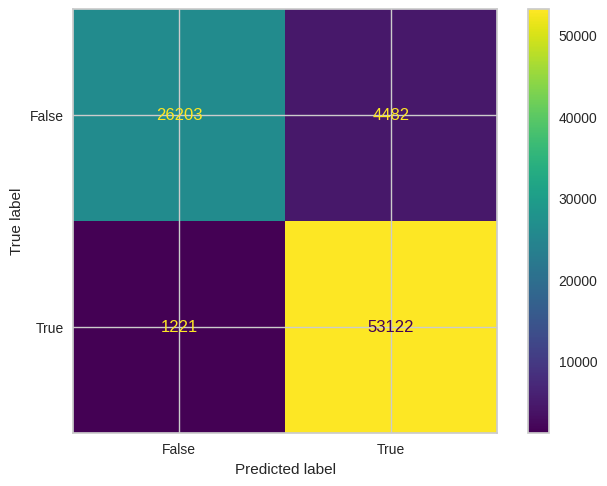

In [51]:
rf1 = RandomForestClassifier(n_estimators=30, max_depth=10)
rf1.fit(X_train, y_train_mod3)
y_pred = rf1.predict(X_test)
print("score on test: " + str(rf1.score(X_test, y_test)))
print("score on train: "+ str(rf1.score(X_train, y_train_mod3)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_rf_b['45%']=acc

AUC: 0.9859


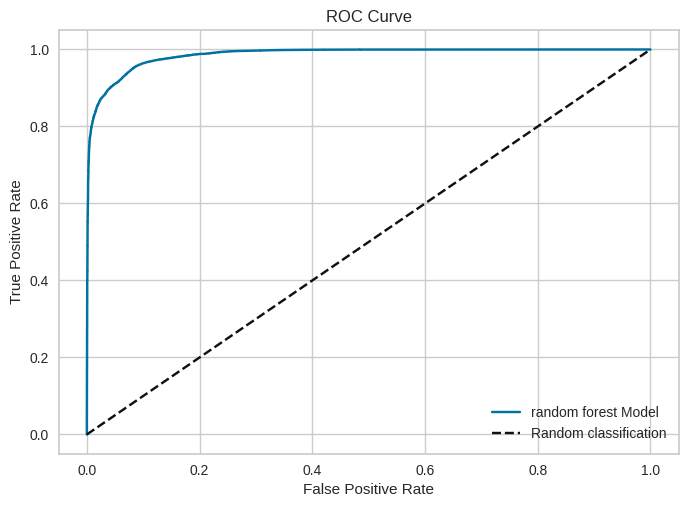

In [52]:
rf1_predproba = rf1.predict_proba(X_test)[:, 1]
AUC_rf1 = roc_auc_score(y_test, rf1_predproba)
print(f'AUC: {AUC_rf1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, rf1_predproba)
plt.plot(fpr, tpr, label='random forest Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

score on test: 0.8245871948064167
score on train: 0.788101720442565
              precision    recall  f1-score   support

           0       0.91      0.57      0.70     30685
           1       0.80      0.97      0.88     54343

    accuracy                           0.82     85028
   macro avg       0.86      0.77      0.79     85028
weighted avg       0.84      0.82      0.81     85028



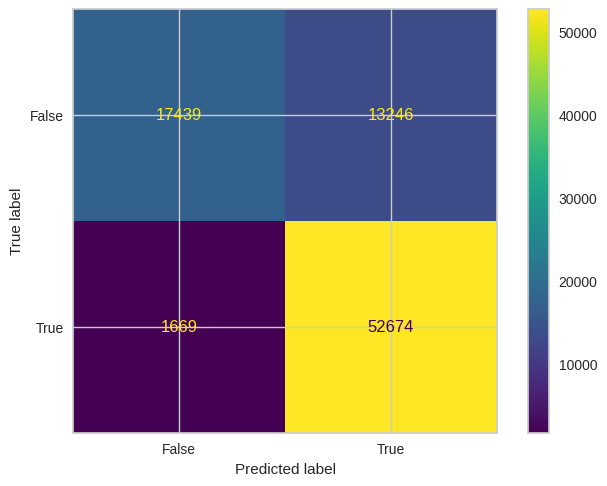

In [53]:
xgb1 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb1.fit(X_train, y_train_mod3)
y_pred = xgb1.predict(X_test)
print("score on test: " + str(xgb1.score(X_test, y_test)))
print("score on train: "+ str(xgb1.score(X_train, y_train_mod3)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_xgb_b['45%']=acc

AUC: 0.9252


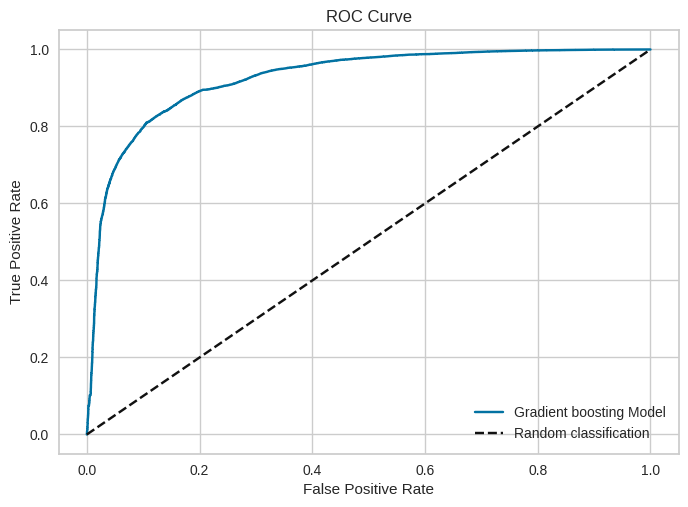

In [54]:
# ROC curve and AUC
xgb1_predproba = xgb1.predict_proba(X_test)[:, 1]
AUC_xgb1 = roc_auc_score(y_test, xgb1_predproba)
print(f'AUC: {AUC_xgb1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, xgb1_predproba)
plt.plot(fpr, tpr, label='Gradient boosting Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Epoch 1/100
1349/1349 [==============================] - 4s 2ms/step - loss: 0.5442 - accuracy: 0.7480
Epoch 2/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.5346 - accuracy: 0.7554
Epoch 3/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.5315 - accuracy: 0.7580
Epoch 4/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.5300 - accuracy: 0.7595
Epoch 5/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.5280 - accuracy: 0.7624
Epoch 6/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.5267 - accuracy: 0.7636
Epoch 7/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.5250 - accuracy: 0.7661
Epoch 8/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.5235 - accuracy: 0.7682
Epoch 9/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.5222 - accuracy: 0.7693
Epoch 10/100
1349/1349 [==============================] - 3s 2ms/step - l

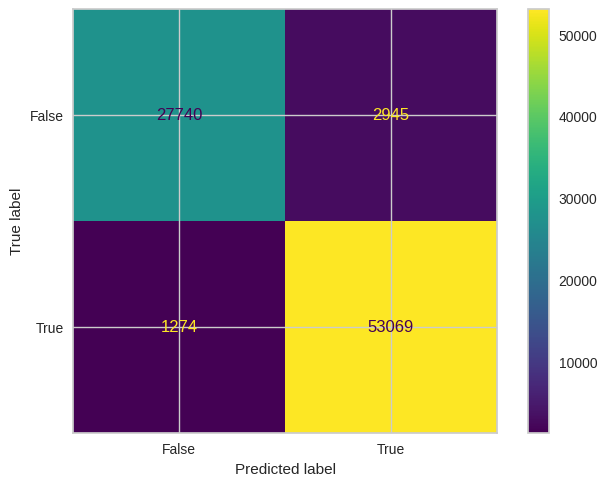

In [55]:
model=models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(42,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)
model.fit(X_train, y_train_mod3, batch_size=128, epochs=100, callbacks=[earlystopping])

y_pred = model.predict(X_test)
print("score on test: " + str(model.evaluate(X_test,y_test)[1]))
print("score on train: "+ str(model.evaluate(X_train,y_train_mod3)[1]))

scores=model.evaluate(X_test, y_test, verbose=0)
res_nn_b['45%']=scores[1]
from sklearn import metrics
y_pred_mat = y_pred.round()
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [56]:
y_true_int = y_test.values.ravel()
y_pred_int = y_pred.round().ravel().astype('int')
report = metrics.classification_report(y_true_int, y_pred_int)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.90      0.93     30685
           1       0.95      0.98      0.96     54343

    accuracy                           0.95     85028
   macro avg       0.95      0.94      0.95     85028
weighted avg       0.95      0.95      0.95     85028



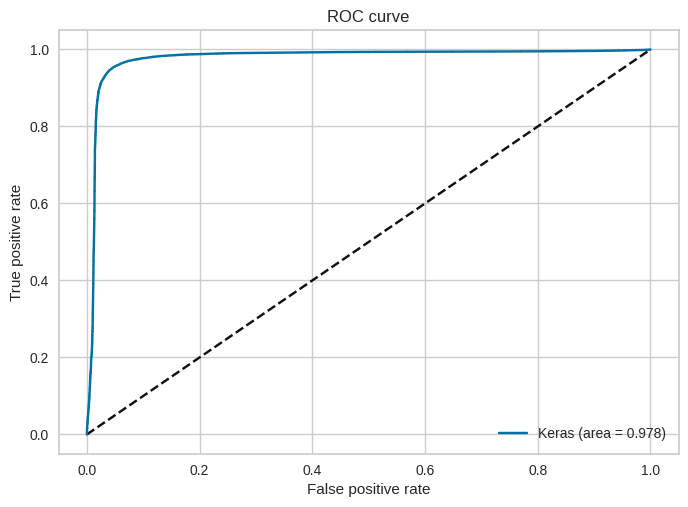

In [57]:
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

score on test: 0.48093569177212214
score on train: 0.5641082083067833
              precision    recall  f1-score   support

           0       0.82      0.79      0.80     30685
           1       0.08      0.00      0.00     19493
           2       0.39      0.86      0.53     14798
           3       0.30      0.41      0.34      7903
           4       0.01      0.02      0.02      5312
           5       0.89      0.12      0.21      4653
           6       0.52      0.03      0.06       850
           7       0.00      0.00      0.00       771
           8       1.00      0.00      0.00       509
           9       0.00      0.00      0.00        54

    accuracy                           0.48     85028
   macro avg       0.40      0.22      0.20     85028
weighted avg       0.47      0.48      0.43     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


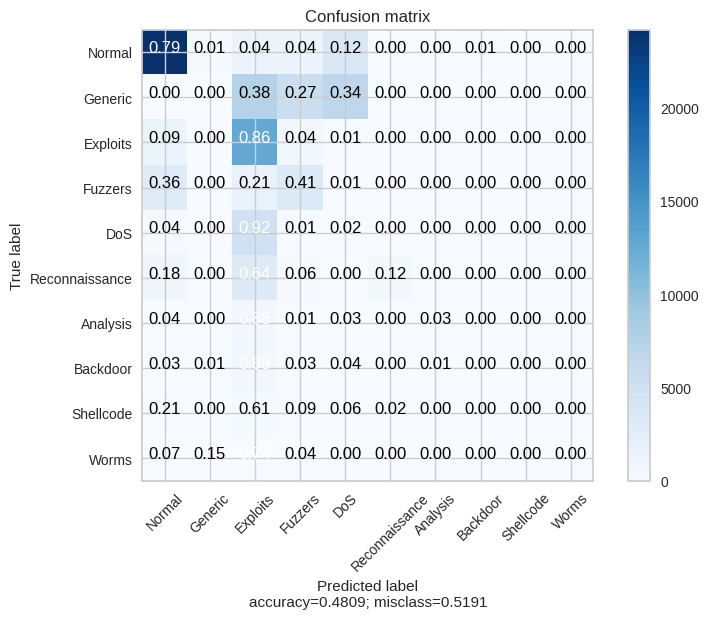

In [58]:
dtree1 = DecisionTreeClassifier(max_depth = 10).fit(X_train, y_multi_train_mod3)
y_pred = dtree1.predict(X_test)
print("score on test: " + str(dtree1.score(X_test, y_multi_test)))
print("score on train: "+ str(dtree1.score(X_train, y_multi_train_mod3)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_tree['45%']=acc

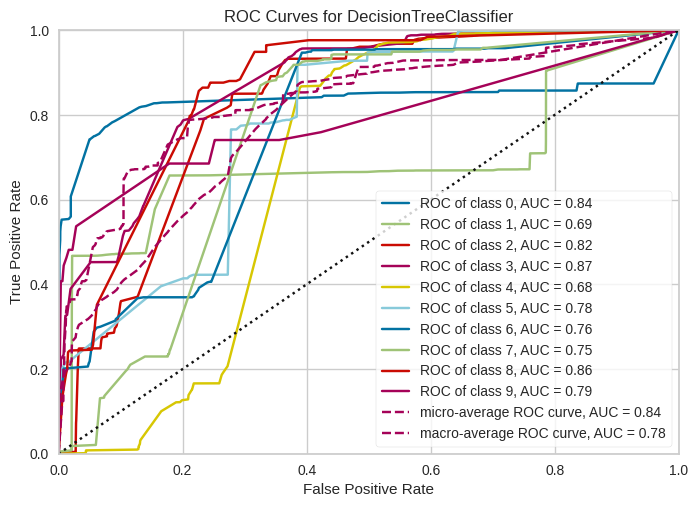

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=DecisionTreeClassifier(max_depth=10))

In [59]:
plot_ROC_curve(dtree1, X_train, y_multi_train_mod3, X_test, y_multi_test)

<ipython-input-60-61b4c3d963da>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train, y_multi_train_mod3)


score on test: 0.7429199793009361
score on train: 0.5673115912645542
              precision    recall  f1-score   support

           0       0.68      0.99      0.81     30685
           1       1.00      0.96      0.98     19493
           2       0.61      0.74      0.67     14798
           3       0.83      0.19      0.31      7903
           4       0.71      0.01      0.02      5312
           5       0.93      0.32      0.48      4653
           6       0.00      0.00      0.00       850
           7       0.00      0.00      0.00       771
           8       0.00      0.00      0.00       509
           9       0.00      0.00      0.00        54

    accuracy                           0.74     85028
   macro avg       0.48      0.32      0.33     85028
weighted avg       0.75      0.74      0.69     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


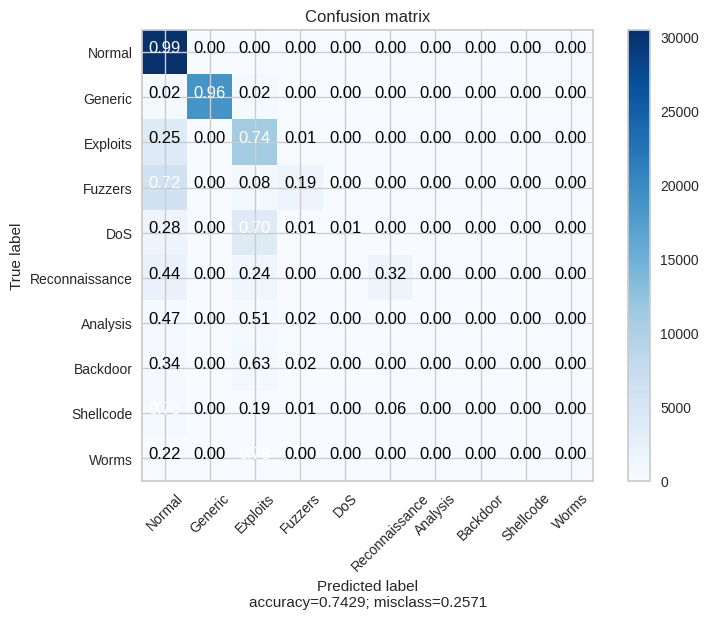

In [60]:
rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train, y_multi_train_mod3)
y_pred = rf2.predict(X_test)
print("score on test: " + str(rf2.score(X_test, y_multi_test)))
print("score on train: "+ str(rf2.score(X_train, y_multi_train_mod3)))
print(metrics.classification_report(y_multi_test, y_pred))
accuracy = rf2.score(X_test, y_multi_test)
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_rf_m['45%']=acc

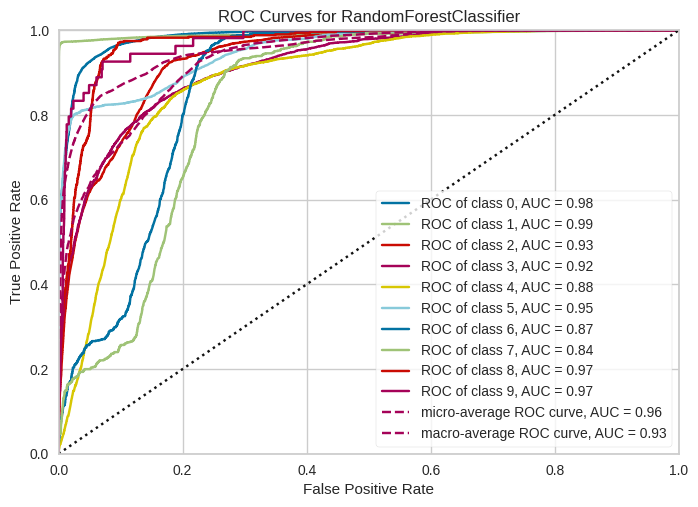

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=RandomForestClassifier(max_depth=10, n_estimators=30))

In [61]:
plot_ROC_curve(rf2, X_train, y_multi_train_mod3, X_test, y_multi_test)

score on test: 0.5367996424707155
score on train: 0.599351213578173
              precision    recall  f1-score   support

           0       0.48      0.98      0.64     30685
           1       0.26      0.01      0.01     19493
           2       0.71      0.55      0.62     14798
           3       0.70      0.56      0.62      7903
           4       0.27      0.04      0.07      5312
           5       0.83      0.56      0.67      4653
           6       0.90      0.02      0.04       850
           7       0.25      0.02      0.04       771
           8       0.68      0.22      0.33       509
           9       0.50      0.09      0.16        54

    accuracy                           0.54     85028
   macro avg       0.56      0.31      0.32     85028
weighted avg       0.50      0.54      0.44     85028



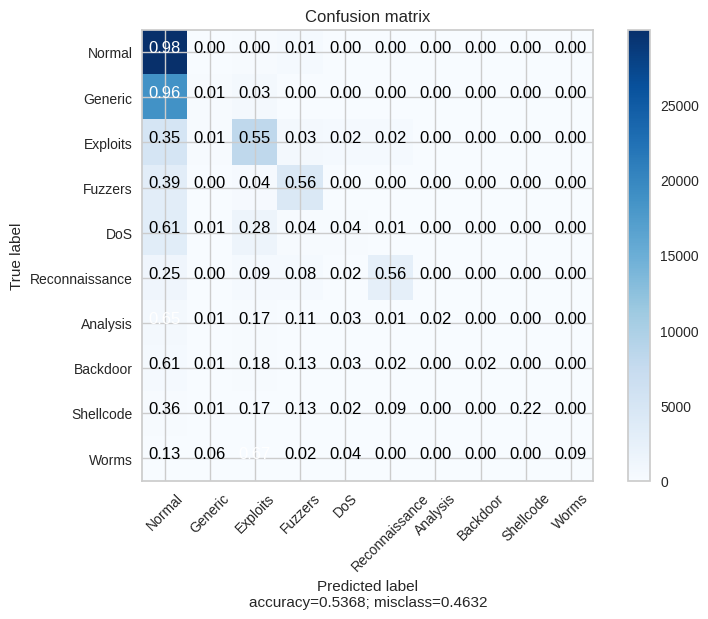

In [62]:
xgb2 = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb2.fit(X_train, y_multi_train_mod3)
y_pred = xgb2.predict(X_test)
print("score on test: " + str(xgb2.score(X_test, y_multi_test)))
print("score on train: "+ str(xgb2.score(X_train, y_multi_train_mod3)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_xgb_m['45%']=acc

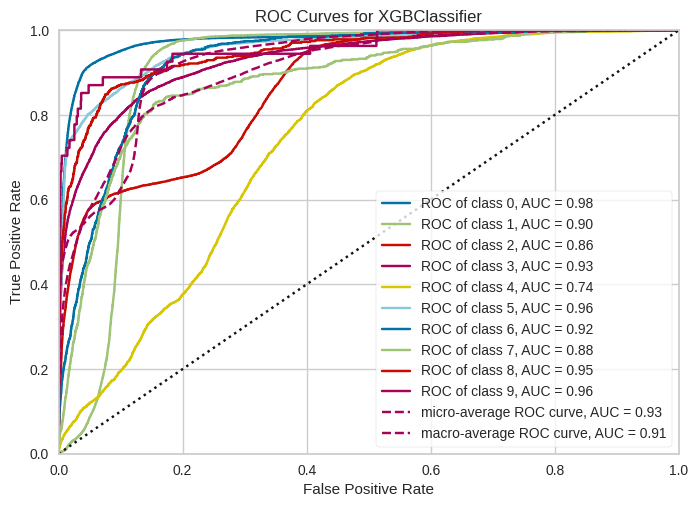

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, g...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))

In [63]:
plot_ROC_curve(xgb2, X_train, y_multi_train_mod3, X_test, y_multi_test)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               5504      
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 dense_23 (Dense)            (None, 10)                650       
                                                                 
Total params: 18,570
Trainable params: 18,570
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1349/1349 [==============================] - 3s 2ms/step - loss: 1.4369 - accuracy: 0.5192
Epoch 2/100
1349/1349 [==============================] - 2s 2ms/step - loss: 1.

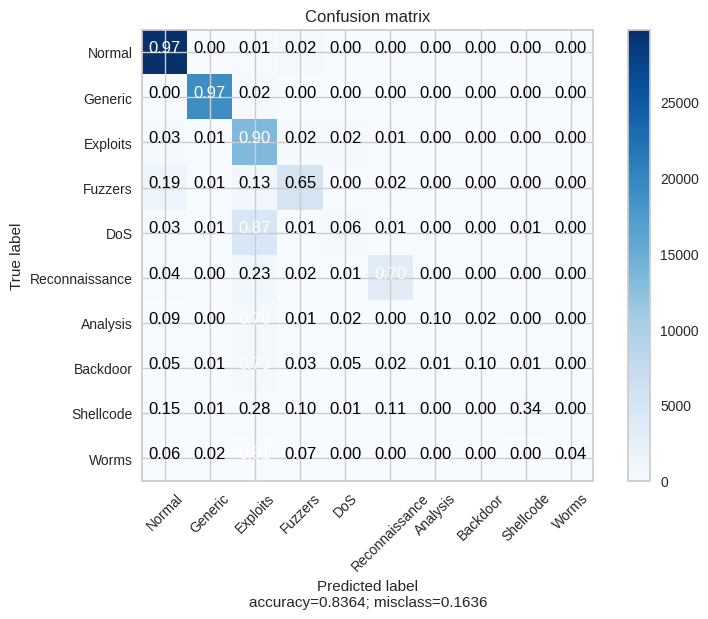

In [64]:
model2 = models.Sequential()
model2.add(layers.Dense(128, input_shape = (42,), activation = "relu"))
model2.add(layers.Dense(64, activation = "relu"))
model2.add(layers.Dense(64,activation="relu"))
model2.add(layers.Dense(10, activation = "softmax"))
model2.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics = ["accuracy"])
model2.summary()

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)

model2.fit(X_train,y_multi_train_mod3,epochs=100,batch_size=128,callbacks=[earlystopping])
y_pred_arr = model2.predict(X_test)
y_pred = np.argmax(y_pred_arr, axis=1)

scores=model2.evaluate(X_test, y_multi_test, verbose=0)
res_nn_m['45%']=scores[1]
print("score on test: " + str(model2.evaluate(X_test,y_multi_test)[1]))
print("score on train: "+ str(model2.evaluate(X_train,y_multi_train_mod3)[1]))
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)

In [65]:
y_true_int = y_multi_test.values.ravel()
y_pred_int = y_pred.copy()
report = metrics.classification_report(y_true_int, y_pred_int)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     30685
           1       0.99      0.97      0.98     19493
           2       0.60      0.90      0.72     14798
           3       0.82      0.65      0.72      7903
           4       0.40      0.06      0.10      5312
           5       0.86      0.70      0.77      4653
           6       0.61      0.10      0.17       850
           7       0.64      0.10      0.17       771
           8       0.52      0.34      0.41       509
           9       0.33      0.04      0.07        54

    accuracy                           0.84     85028
   macro avg       0.67      0.48      0.51     85028
weighted avg       0.83      0.84      0.81     85028



ROC AUC score: 0.9382349428142008


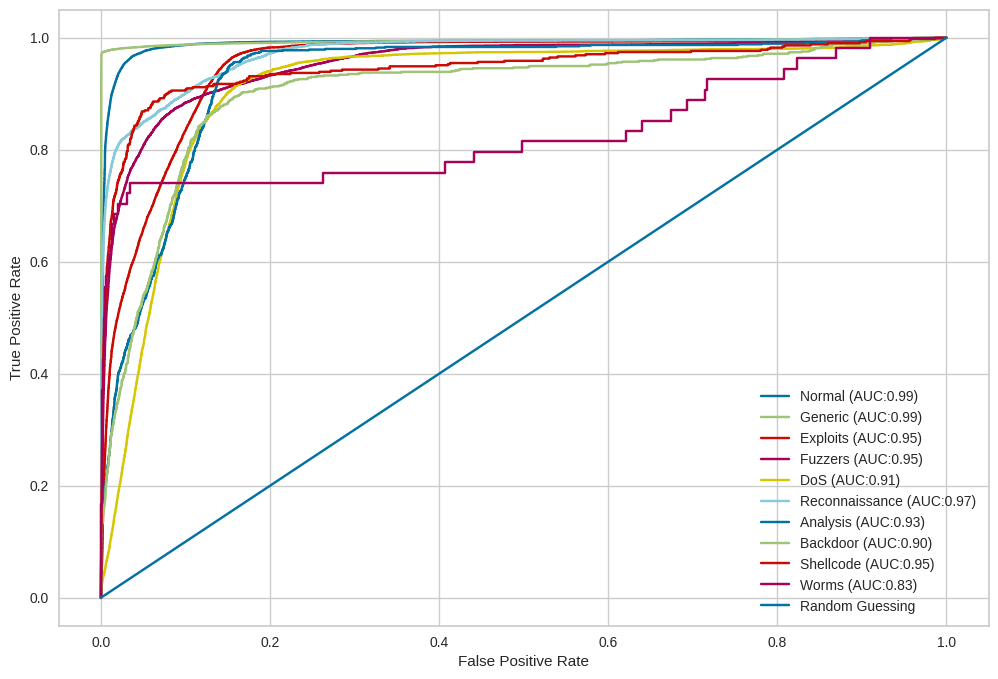

In [66]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
print('ROC AUC score:', multiclass_roc_auc_score(y_multi_test, y_pred_arr))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

60% label flipped

In [67]:
a, b = np.split(y_train, [int(.6*len(y_train))])
a = a.sample(frac=1, random_state=42)
y_train_mod4 = pd.concat([a, b], axis=0)
y_train_mod4

label
8264        0
13884       0
24043       1
80033       0
61137       1
...       ...
172625      0
172626      0
172627      1
172628      1
172629      1

[172630 rows x 1 columns]

In [68]:
a, b = np.split(y_multi_train, [int(.6*len(y_multi_train))])
a = a.sample(frac=1, random_state=42)
y_multi_train_mod4 = pd.concat([a, b], axis=0)
y_multi_train_mod4

attack_cat
8264             0
13884            0
24043            4
80033            0
61137            2
...            ...
172625           0
172626           0
172627           2
172628           1
172629           3

[172630 rows x 1 columns]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score on test: 0.8924589546972762
score on train: 0.6957017899553959
              precision    recall  f1-score   support

           0       0.99      0.71      0.83     30685
           1       0.86      1.00      0.92     54343

    accuracy                           0.89     85028
   macro avg       0.92      0.85      0.87     85028
weighted avg       0.91      0.89      0.89     85028



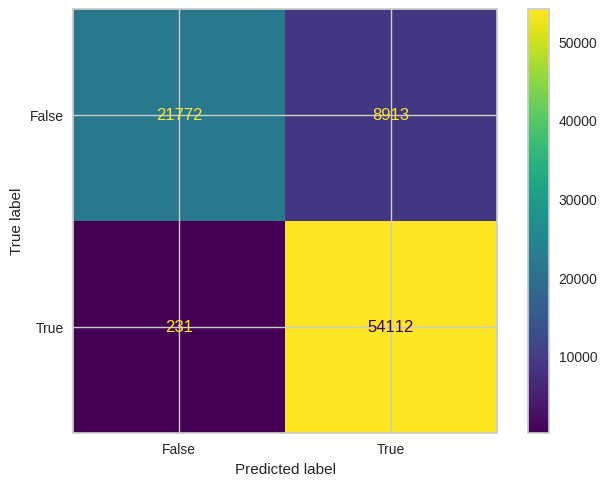

In [69]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)
lr1=LogisticRegression()
lr1.fit(X_train, y_train_mod4)
y_pred = lr1.predict(X_test)
print("score on test: " + str(lr1.score(X_test, y_test)))
print("score on train: "+ str(lr1.score(X_train, y_train_mod4)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_log['60%']=acc

AUC: 0.9597


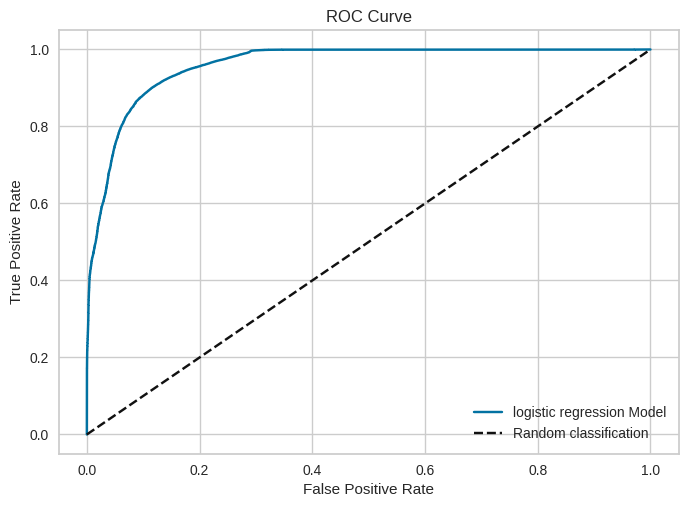

In [70]:
# ROC curve and AUC
lr1_predproba = lr1.predict_proba(X_test)[:, 1]
AUC_lr1 = roc_auc_score(y_test, lr1_predproba)
print(f'AUC: {AUC_lr1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, lr1_predproba)
plt.plot(fpr, tpr, label='logistic regression Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<ipython-input-71-25f278696cdb>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train, y_train_mod4)


score on test: 0.9023968575057628
score on train: 0.7075363494178301
              precision    recall  f1-score   support

           0       0.99      0.73      0.84     30685
           1       0.87      1.00      0.93     54343

    accuracy                           0.90     85028
   macro avg       0.93      0.87      0.89     85028
weighted avg       0.91      0.90      0.90     85028



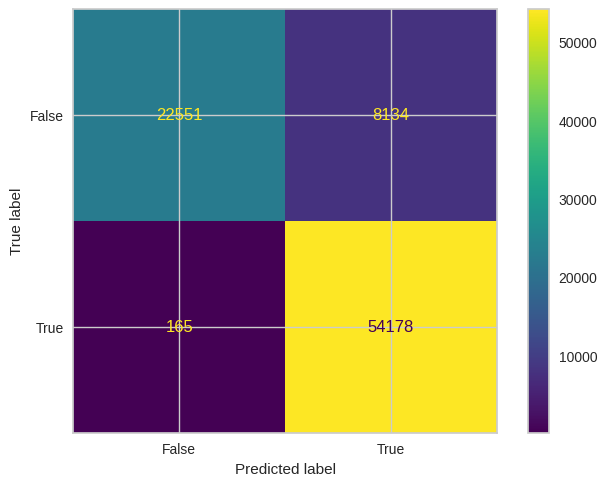

In [71]:
rf1 = RandomForestClassifier(n_estimators=30, max_depth=10)
rf1.fit(X_train, y_train_mod4)
y_pred = rf1.predict(X_test)
print("score on test: " + str(rf1.score(X_test, y_test)))
print("score on train: "+ str(rf1.score(X_train, y_train_mod4)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_rf_b['60%']=acc

AUC: 0.9848


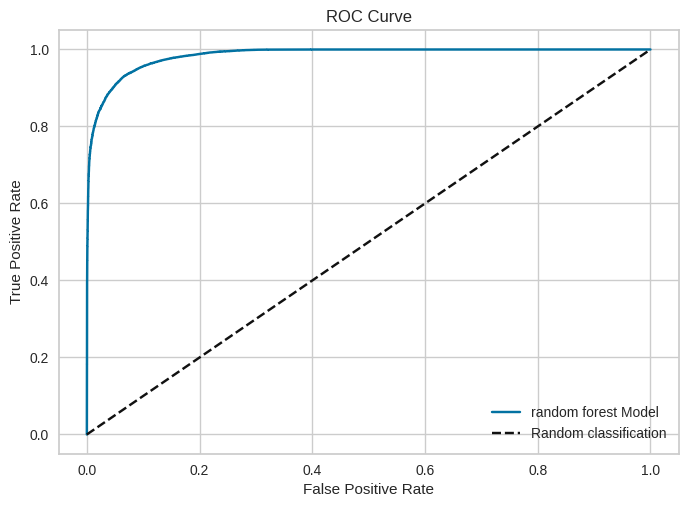

In [72]:
rf1_predproba = rf1.predict_proba(X_test)[:, 1]
AUC_rf1 = roc_auc_score(y_test, rf1_predproba)
print(f'AUC: {AUC_rf1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, rf1_predproba)
plt.plot(fpr, tpr, label='random forest Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

score on test: 0.8740414922143294
score on train: 0.7303713143717778
              precision    recall  f1-score   support

           0       0.99      0.66      0.79     30685
           1       0.84      1.00      0.91     54343

    accuracy                           0.87     85028
   macro avg       0.91      0.83      0.85     85028
weighted avg       0.89      0.87      0.87     85028



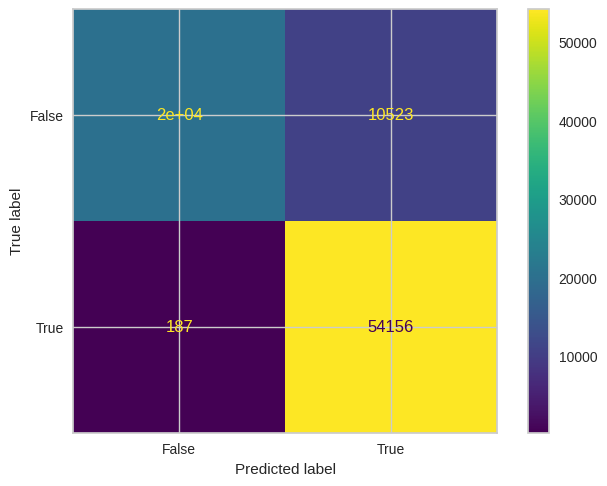

In [73]:
xgb1 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb1.fit(X_train, y_train_mod4)
y_pred = xgb1.predict(X_test)
print("score on test: " + str(xgb1.score(X_test, y_test)))
print("score on train: "+ str(xgb1.score(X_train, y_train_mod4)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_xgb_b['60%']=acc

AUC: 0.9656


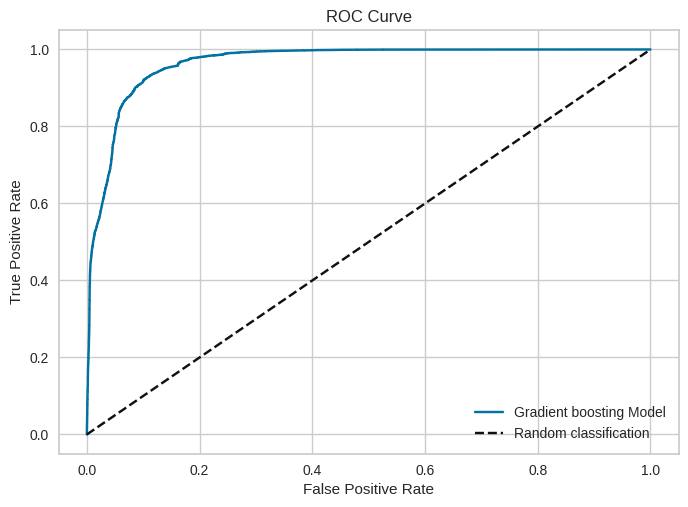

In [74]:
# ROC curve and AUC
xgb1_predproba = xgb1.predict_proba(X_test)[:, 1]
AUC_xgb1 = roc_auc_score(y_test, xgb1_predproba)
print(f'AUC: {AUC_xgb1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, xgb1_predproba)
plt.plot(fpr, tpr, label='Gradient boosting Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Epoch 1/100
1349/1349 [==============================] - 4s 2ms/step - loss: 0.6002 - accuracy: 0.6949
Epoch 2/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.5956 - accuracy: 0.6972
Epoch 3/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.5938 - accuracy: 0.6975
Epoch 4/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.5925 - accuracy: 0.6986
Epoch 5/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.5915 - accuracy: 0.6991
Epoch 6/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.5908 - accuracy: 0.6996
Epoch 7/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.5903 - accuracy: 0.7001
Epoch 8/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.5897 - accuracy: 0.7009
Epoch 9/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.5894 - accuracy: 0.7017
Epoch 10/100
1349/1349 [==============================] - 3s 2ms/step - l

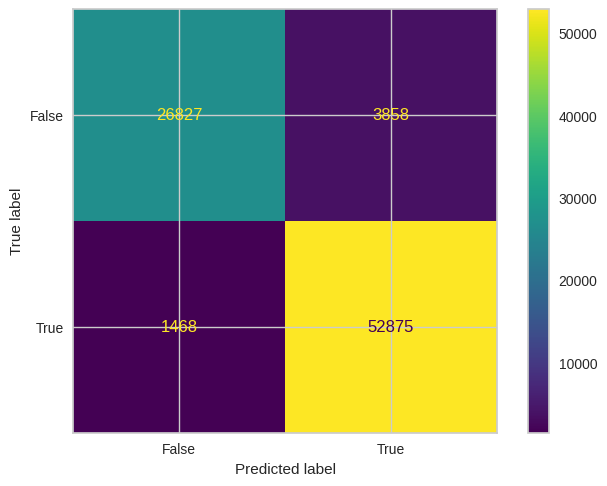

In [75]:
model=models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(42,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)
model.fit(X_train, y_train_mod4, batch_size=128, epochs=100, callbacks=[earlystopping])

y_pred = model.predict(X_test)
print("score on test: " + str(model.evaluate(X_test,y_test)[1]))
print("score on train: "+ str(model.evaluate(X_train,y_train_mod4)[1]))

scores=model.evaluate(X_test, y_test, verbose=0)
res_nn_b['60%']=scores[1]
from sklearn import metrics
y_pred_mat = y_pred.round()
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [76]:
y_true_int = y_test.values.ravel()
y_pred_int = y_pred.round().ravel().astype('int')
report = metrics.classification_report(y_true_int, y_pred_int)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.87      0.91     30685
           1       0.93      0.97      0.95     54343

    accuracy                           0.94     85028
   macro avg       0.94      0.92      0.93     85028
weighted avg       0.94      0.94      0.94     85028



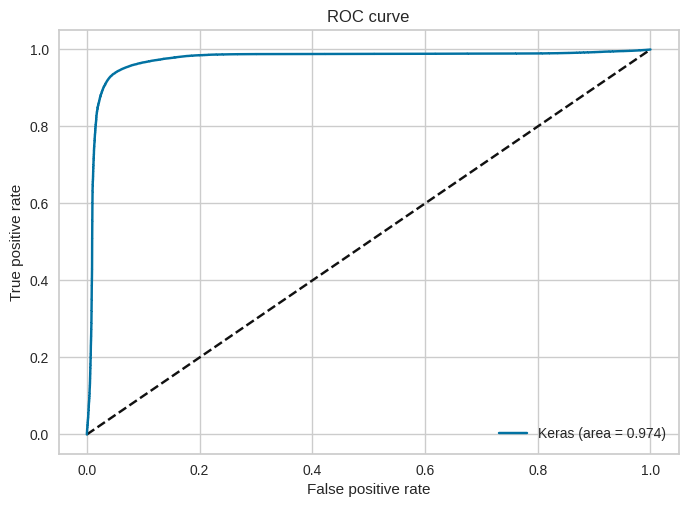

In [77]:
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

score on test: 0.6434586253939879
score on train: 0.48047847998609744
              precision    recall  f1-score   support

           0       0.74      0.71      0.73     30685
           1       0.92      0.89      0.90     19493
           2       0.44      0.80      0.57     14798
           3       0.58      0.35      0.44      7903
           4       0.03      0.02      0.02      5312
           5       0.48      0.18      0.27      4653
           6       0.57      0.05      0.09       850
           7       0.19      0.01      0.01       771
           8       0.00      0.00      0.00       509
           9       0.00      0.00      0.00        54

    accuracy                           0.64     85028
   macro avg       0.40      0.30      0.30     85028
weighted avg       0.65      0.64      0.63     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


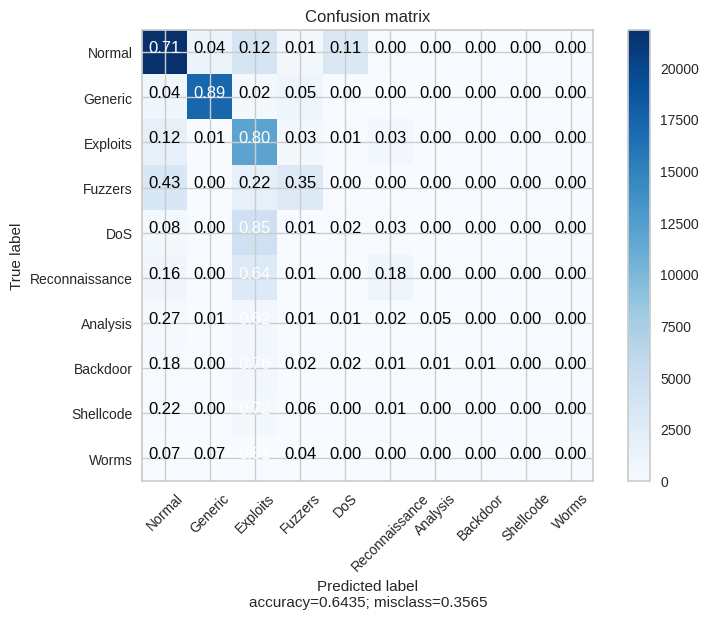

In [78]:
dtree1 = DecisionTreeClassifier(max_depth = 10).fit(X_train, y_multi_train_mod4)
y_pred = dtree1.predict(X_test)
print("score on test: " + str(dtree1.score(X_test, y_multi_test)))
print("score on train: "+ str(dtree1.score(X_train, y_multi_train_mod4)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_tree['60%']=acc

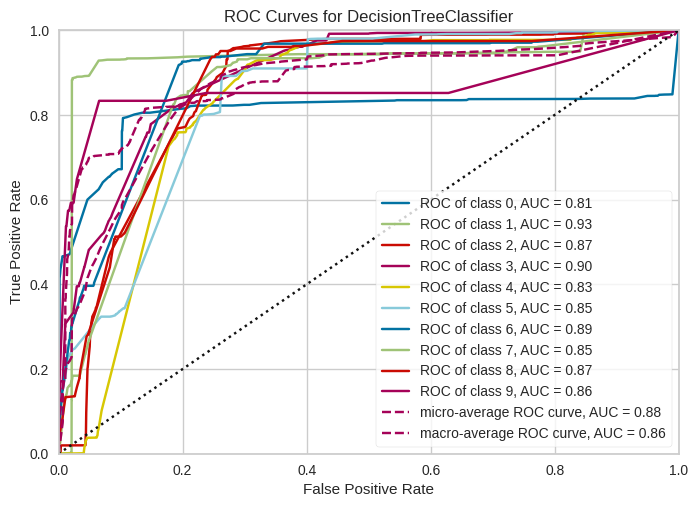

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=DecisionTreeClassifier(max_depth=10))

In [79]:
plot_ROC_curve(dtree1, X_train, y_multi_train_mod4, X_test, y_multi_test)

<ipython-input-80-17d860f9577b>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train, y_multi_train_mod4)


score on test: 0.6598767464835114
score on train: 0.48053640734518915
              precision    recall  f1-score   support

           0       0.54      1.00      0.70     30685
           1       1.00      0.84      0.91     19493
           2       0.75      0.54      0.63     14798
           3       0.92      0.07      0.12      7903
           4       0.87      0.00      0.01      5312
           5       0.99      0.11      0.20      4653
           6       0.00      0.00      0.00       850
           7       0.00      0.00      0.00       771
           8       0.00      0.00      0.00       509
           9       0.00      0.00      0.00        54

    accuracy                           0.66     85028
   macro avg       0.51      0.26      0.26     85028
weighted avg       0.75      0.66      0.59     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


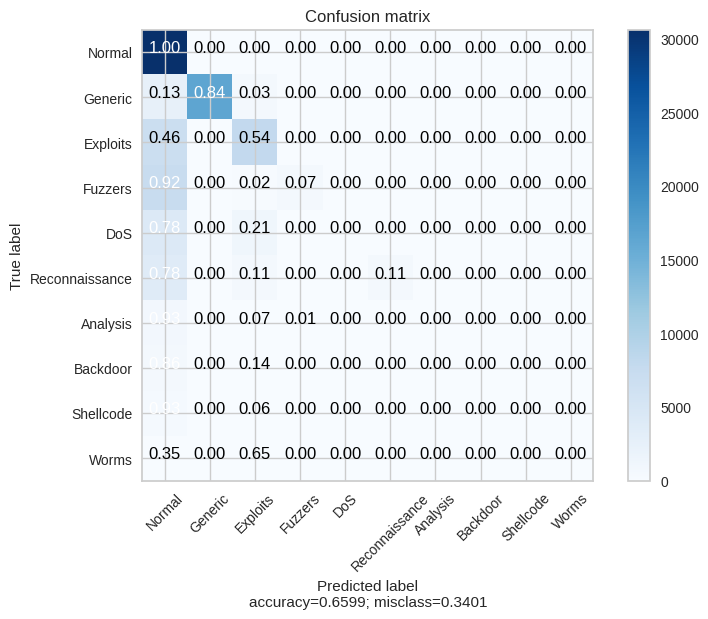

In [80]:
rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train, y_multi_train_mod4)
y_pred = rf2.predict(X_test)
print("score on test: " + str(rf2.score(X_test, y_multi_test)))
print("score on train: "+ str(rf2.score(X_train, y_multi_train_mod4)))
print(metrics.classification_report(y_multi_test, y_pred))
accuracy = rf2.score(X_test, y_multi_test)
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_rf_m['60%']=acc

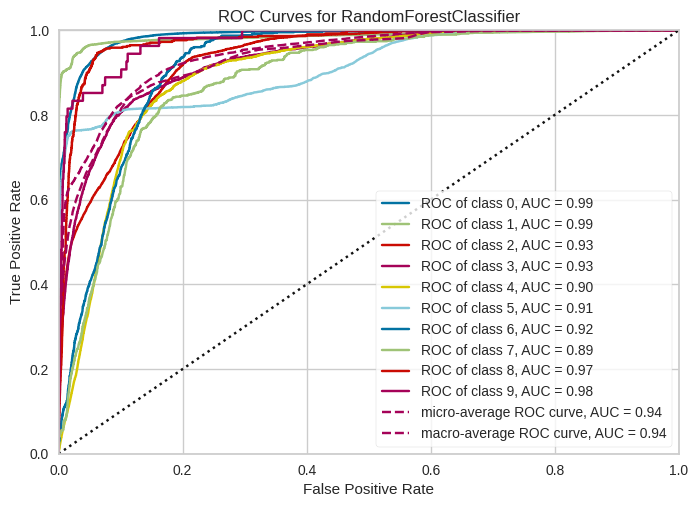

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=RandomForestClassifier(max_depth=10, n_estimators=30))

In [81]:
plot_ROC_curve(rf2, X_train, y_multi_train_mod4, X_test, y_multi_test)

score on test: 0.5330008938232111
score on train: 0.5094189885883103
              precision    recall  f1-score   support

           0       0.48      0.92      0.63     30685
           1       0.09      0.00      0.01     19493
           2       0.63      0.64      0.64     14798
           3       0.71      0.57      0.63      7903
           4       0.16      0.03      0.05      5312
           5       0.91      0.59      0.72      4653
           6       0.70      0.01      0.02       850
           7       0.00      0.00      0.00       771
           8       0.73      0.10      0.18       509
           9       1.00      0.02      0.04        54

    accuracy                           0.53     85028
   macro avg       0.54      0.29      0.29     85028
weighted avg       0.44      0.53      0.44     85028



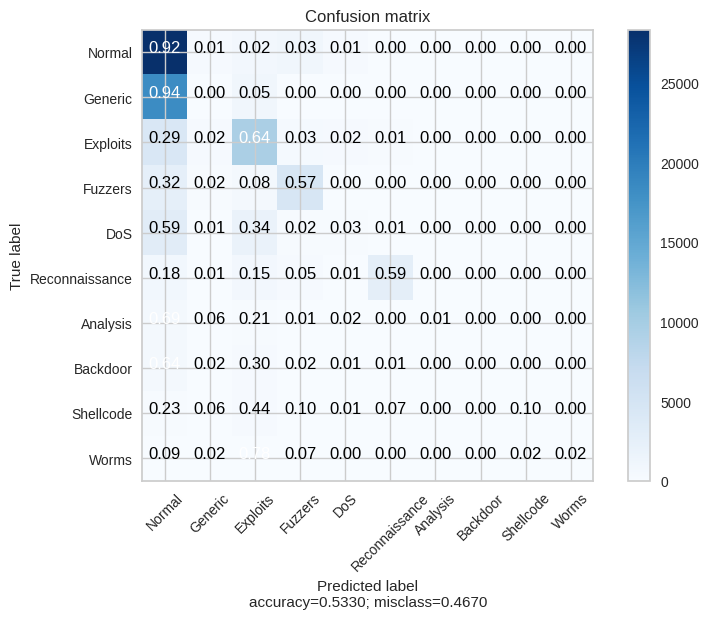

In [82]:
xgb2 = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb2.fit(X_train, y_multi_train_mod4)
y_pred = xgb2.predict(X_test)
print("score on test: " + str(xgb2.score(X_test, y_multi_test)))
print("score on train: "+ str(xgb2.score(X_train, y_multi_train_mod4)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_xgb_m['60%']=acc

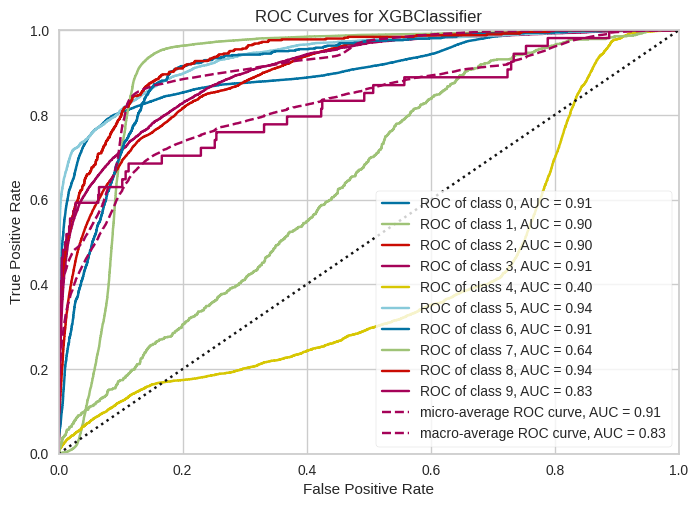

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, g...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))

In [83]:
plot_ROC_curve(xgb2, X_train, y_multi_train_mod4, X_test, y_multi_test)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 128)               5504      
                                                                 
 dense_29 (Dense)            (None, 64)                8256      
                                                                 
 dense_30 (Dense)            (None, 64)                4160      
                                                                 
 dense_31 (Dense)            (None, 10)                650       
                                                                 
Total params: 18,570
Trainable params: 18,570
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1349/1349 [==============================] - 3s 2ms/step - loss: 1.5658 - accuracy: 0.4473
Epoch 2/100
1349/1349 [==============================] - 2s 2ms/step - loss: 1.

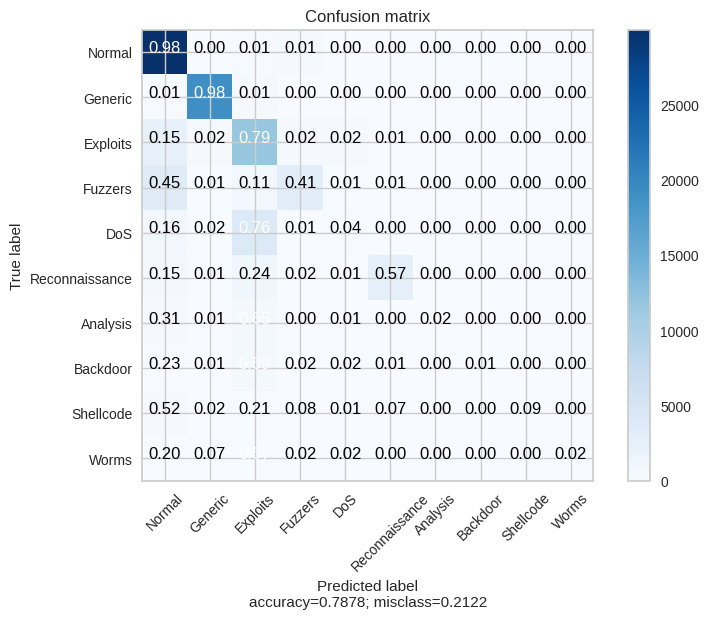

In [84]:
model2 = models.Sequential()
model2.add(layers.Dense(128, input_shape = (42,), activation = "relu"))
model2.add(layers.Dense(64, activation = "relu"))
model2.add(layers.Dense(64,activation="relu"))
model2.add(layers.Dense(10, activation = "softmax"))
model2.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics = ["accuracy"])
model2.summary()

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)

model2.fit(X_train,y_multi_train_mod4,epochs=100,batch_size=128,callbacks=[earlystopping])
y_pred_arr = model2.predict(X_test)
y_pred = np.argmax(y_pred_arr, axis=1)

scores=model2.evaluate(X_test, y_multi_test, verbose=0)
res_nn_m['60%']=scores[1]
print("score on test: " + str(model2.evaluate(X_test,y_multi_test)[1]))
print("score on train: "+ str(model2.evaluate(X_train,y_multi_train_mod4)[1]))
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)

In [85]:
y_true_int = y_multi_test.values.ravel()
y_pred_int = y_pred.copy()
report = metrics.classification_report(y_true_int, y_pred_int)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.98      0.87     30685
           1       0.97      0.98      0.97     19493
           2       0.60      0.79      0.69     14798
           3       0.78      0.41      0.54      7903
           4       0.36      0.04      0.07      5312
           5       0.92      0.57      0.71      4653
           6       0.67      0.02      0.04       850
           7       0.38      0.01      0.02       771
           8       0.51      0.09      0.16       509
           9       0.25      0.02      0.03        54

    accuracy                           0.79     85028
   macro avg       0.62      0.39      0.41     85028
weighted avg       0.77      0.79      0.75     85028



ROC AUC score: 0.9077618632374034


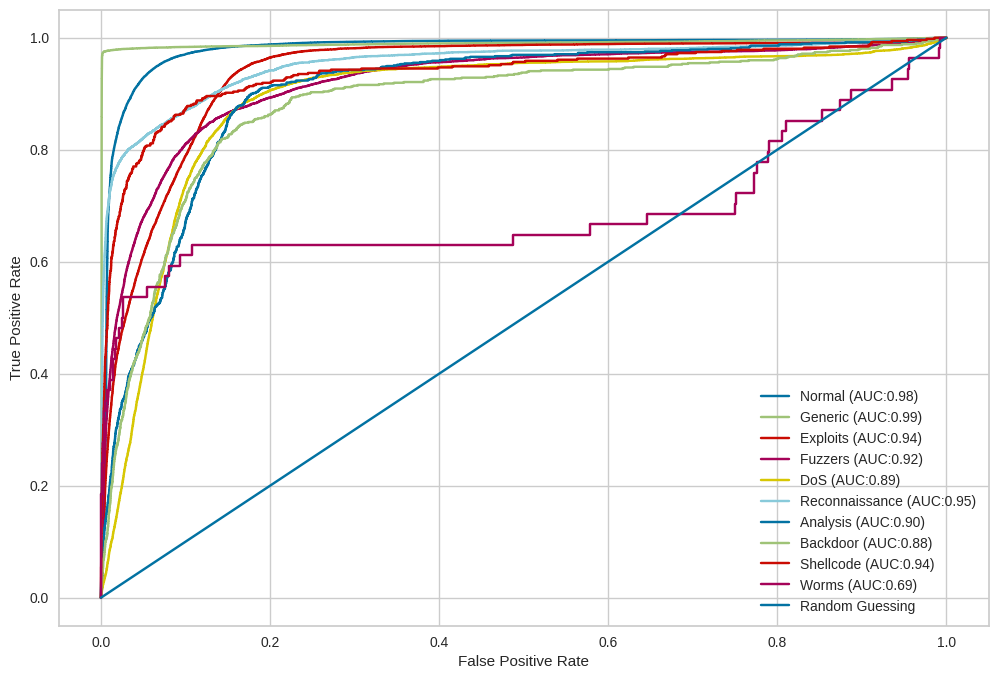

In [86]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
print('ROC AUC score:', multiclass_roc_auc_score(y_multi_test, y_pred_arr))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

75% label flipped

In [87]:
a, b = np.split(y_train, [int(.75*len(y_train))])
a = a.sample(frac=1, random_state=42)
y_train_mod5 = pd.concat([a, b], axis=0)
y_train_mod5

label
26911       1
3995        0
98033       1
72671       1
101587      1
...       ...
172625      0
172626      0
172627      1
172628      1
172629      1

[172630 rows x 1 columns]

In [88]:
a, b = np.split(y_multi_train, [int(.75*len(y_multi_train))])
a = a.sample(frac=1, random_state=42)
y_multi_train_mod5 = pd.concat([a, b], axis=0)
y_multi_train_mod5

attack_cat
26911            2
3995             0
98033            1
72671            2
101587           1
...            ...
172625           0
172626           0
172627           2
172628           1
172629           3

[172630 rows x 1 columns]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score on test: 0.822987721691678
score on train: 0.6469037826565487
              precision    recall  f1-score   support

           0       1.00      0.51      0.68     30685
           1       0.78      1.00      0.88     54343

    accuracy                           0.82     85028
   macro avg       0.89      0.76      0.78     85028
weighted avg       0.86      0.82      0.81     85028



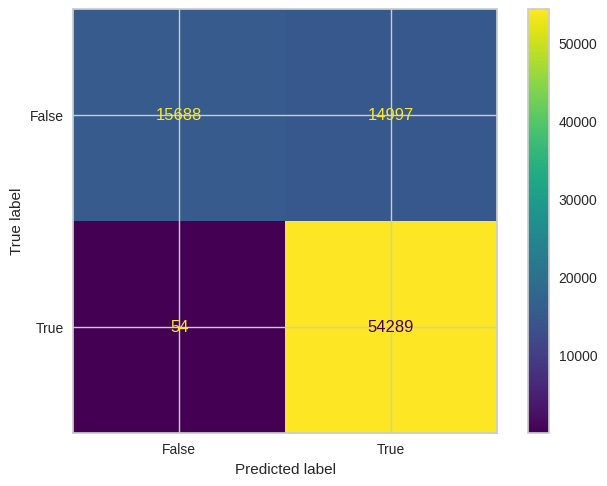

In [89]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)
lr1=LogisticRegression()
lr1.fit(X_train, y_train_mod5)
y_pred = lr1.predict(X_test)
print("score on test: " + str(lr1.score(X_test, y_test)))
print("score on train: "+ str(lr1.score(X_train, y_train_mod5)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_log['75%']=acc

AUC: 0.9591


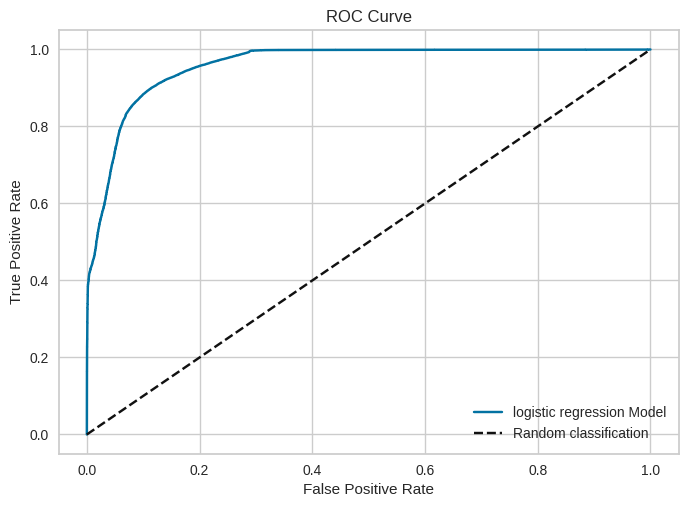

In [90]:
# ROC curve and AUC
lr1_predproba = lr1.predict_proba(X_test)[:, 1]
AUC_lr1 = roc_auc_score(y_test, lr1_predproba)
print(f'AUC: {AUC_lr1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, lr1_predproba)
plt.plot(fpr, tpr, label='logistic regression Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<ipython-input-91-e52af65ba18a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train, y_train_mod5)


score on test: 0.7614903325963213
score on train: 0.668360076464114
              precision    recall  f1-score   support

           0       1.00      0.34      0.51     30685
           1       0.73      1.00      0.84     54343

    accuracy                           0.76     85028
   macro avg       0.86      0.67      0.67     85028
weighted avg       0.83      0.76      0.72     85028



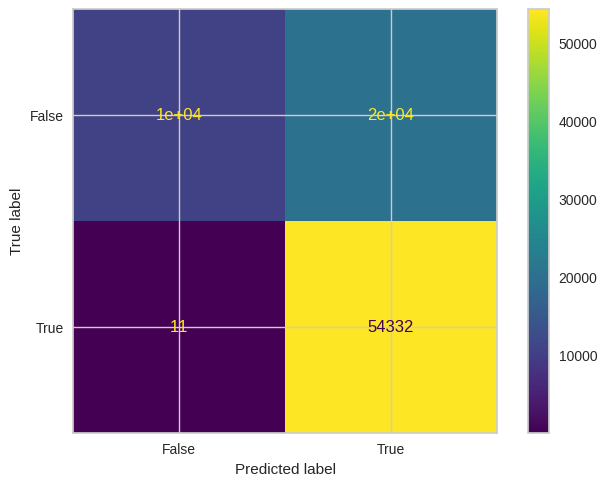

In [91]:
rf1 = RandomForestClassifier(n_estimators=30, max_depth=10)
rf1.fit(X_train, y_train_mod5)
y_pred = rf1.predict(X_test)
print("score on test: " + str(rf1.score(X_test, y_test)))
print("score on train: "+ str(rf1.score(X_train, y_train_mod5)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_rf_b['75%']=acc

AUC: 0.9780


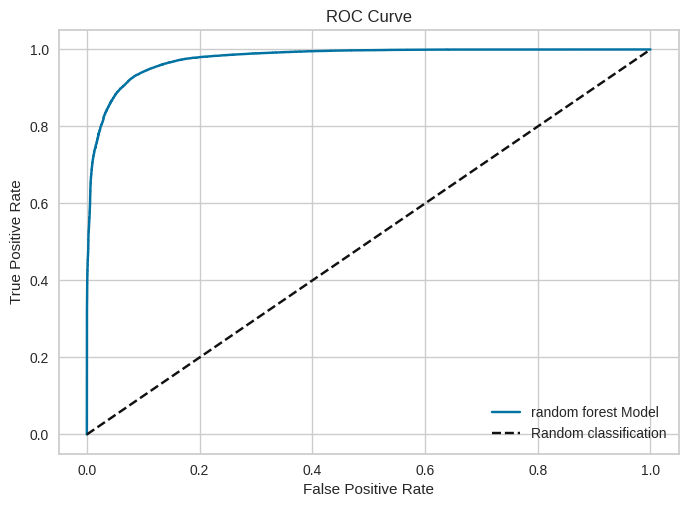

In [92]:
rf1_predproba = rf1.predict_proba(X_test)[:, 1]
AUC_rf1 = roc_auc_score(y_test, rf1_predproba)
print(f'AUC: {AUC_rf1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, rf1_predproba)
plt.plot(fpr, tpr, label='random forest Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

score on test: 0.710542409559204
score on train: 0.6886230666743903
              precision    recall  f1-score   support

           0       0.93      0.21      0.35     30685
           1       0.69      0.99      0.81     54343

    accuracy                           0.71     85028
   macro avg       0.81      0.60      0.58     85028
weighted avg       0.78      0.71      0.65     85028



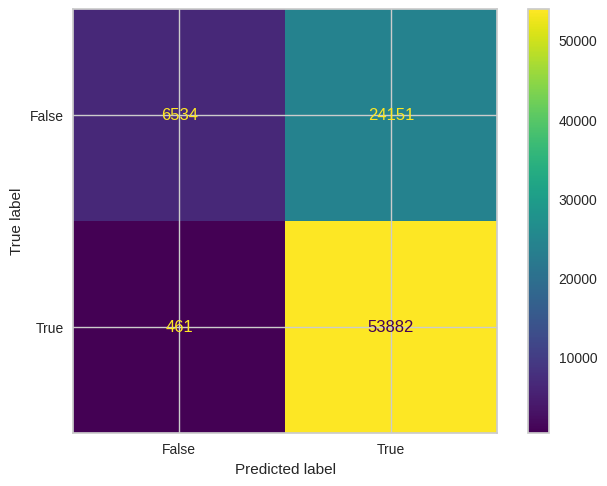

In [93]:
xgb1 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb1.fit(X_train, y_train_mod5)
y_pred = xgb1.predict(X_test)
print("score on test: " + str(xgb1.score(X_test, y_test)))
print("score on train: "+ str(xgb1.score(X_train, y_train_mod5)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_xgb_b['75%']=acc

AUC: 0.7870


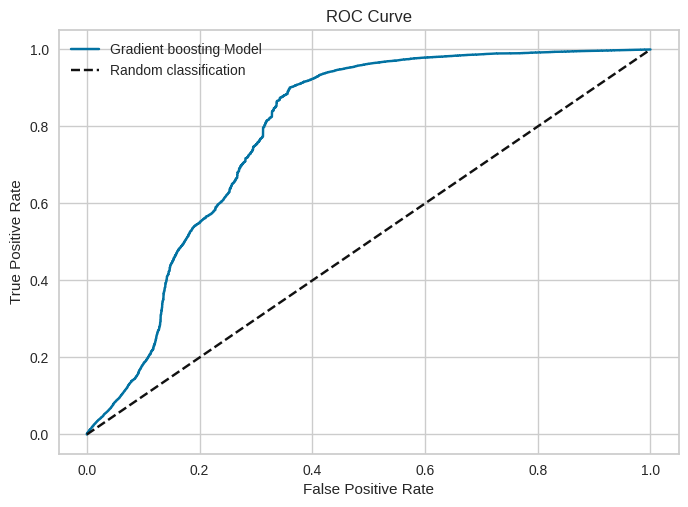

In [94]:
# ROC curve and AUC
xgb1_predproba = xgb1.predict_proba(X_test)[:, 1]
AUC_xgb1 = roc_auc_score(y_test, xgb1_predproba)
print(f'AUC: {AUC_xgb1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, xgb1_predproba)
plt.plot(fpr, tpr, label='Gradient boosting Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Epoch 1/100
1349/1349 [==============================] - 4s 2ms/step - loss: 0.6345 - accuracy: 0.6463
Epoch 2/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.6321 - accuracy: 0.6484
Epoch 3/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.6314 - accuracy: 0.6482
Epoch 4/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.6307 - accuracy: 0.6493
Epoch 5/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.6303 - accuracy: 0.6485
Epoch 6/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.6298 - accuracy: 0.6492
Epoch 7/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.6297 - accuracy: 0.6495
Epoch 8/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.6294 - accuracy: 0.6498
Epoch 9/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.6291 - accuracy: 0.6493
Epoch 10/100
1349/1349 [==============================] - 3s 2ms/step - l

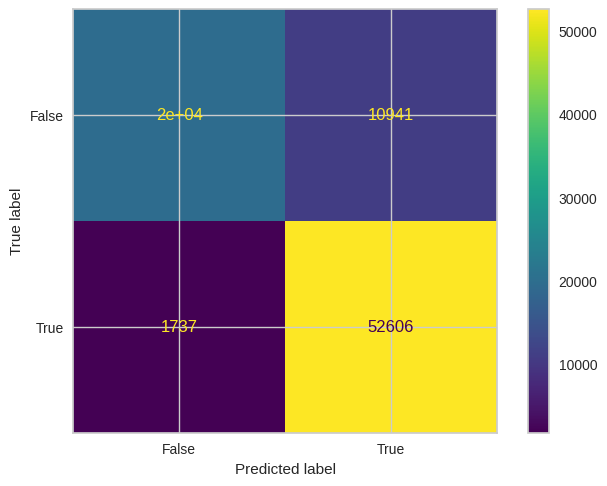

In [95]:
model=models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(42,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)
model.fit(X_train, y_train_mod5, batch_size=128, epochs=100, callbacks=[earlystopping])

y_pred = model.predict(X_test)
print("score on test: " + str(model.evaluate(X_test,y_test)[1]))
print("score on train: "+ str(model.evaluate(X_train,y_train_mod5)[1]))

scores=model.evaluate(X_test, y_test, verbose=0)
res_nn_b['75%']=scores[1]
from sklearn import metrics
y_pred_mat = y_pred.round()
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [96]:
y_true_int = y_test.values.ravel()
y_pred_int = y_pred.round().ravel().astype('int')
report = metrics.classification_report(y_true_int, y_pred_int)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.64      0.76     30685
           1       0.83      0.97      0.89     54343

    accuracy                           0.85     85028
   macro avg       0.87      0.81      0.82     85028
weighted avg       0.86      0.85      0.84     85028



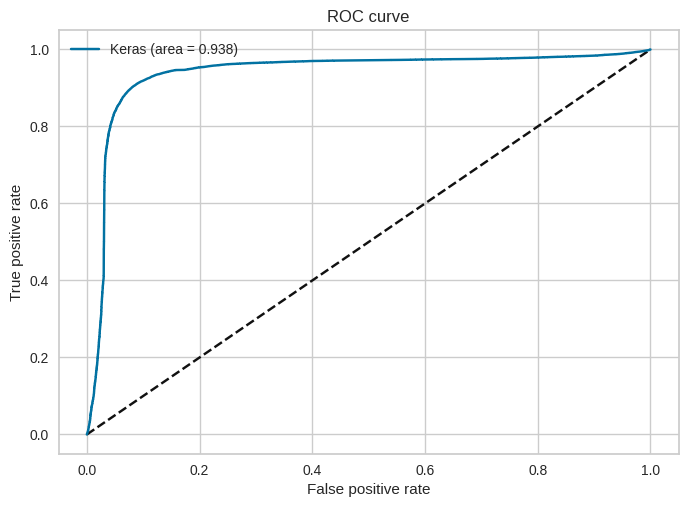

In [97]:
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

score on test: 0.410300136425648
score on train: 0.41126687134333545
              precision    recall  f1-score   support

           0       0.39      0.81      0.53     30685
           1       0.12      0.03      0.04     19493
           2       0.63      0.37      0.47     14798
           3       0.27      0.16      0.20      7903
           4       0.38      0.05      0.09      5312
           5       0.79      0.56      0.65      4653
           6       0.00      0.00      0.00       850
           7       0.00      0.00      0.00       771
           8       1.00      0.00      0.00       509
           9       0.00      0.00      0.00        54

    accuracy                           0.41     85028
   macro avg       0.36      0.20      0.20     85028
weighted avg       0.38      0.41      0.34     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


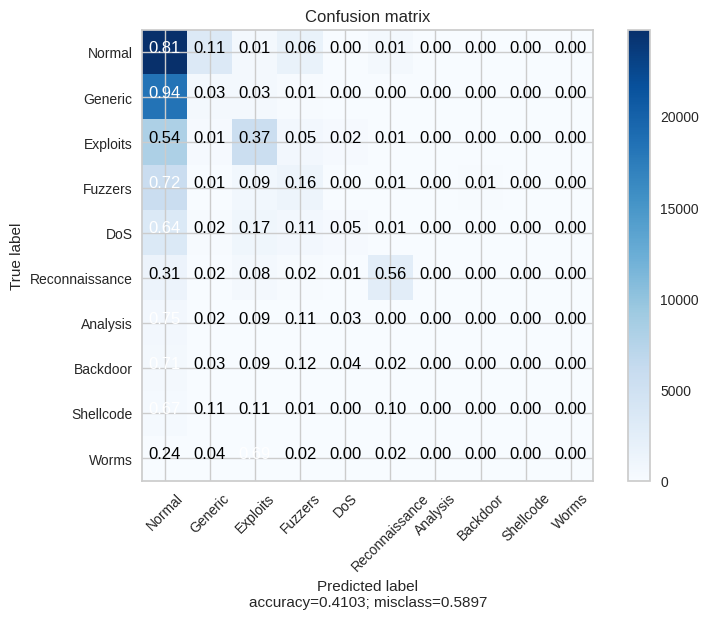

In [98]:
dtree1 = DecisionTreeClassifier(max_depth = 10).fit(X_train, y_multi_train_mod5)
y_pred = dtree1.predict(X_test)
print("score on test: " + str(dtree1.score(X_test, y_multi_test)))
print("score on train: "+ str(dtree1.score(X_train, y_multi_train_mod5)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_tree['75%']=acc

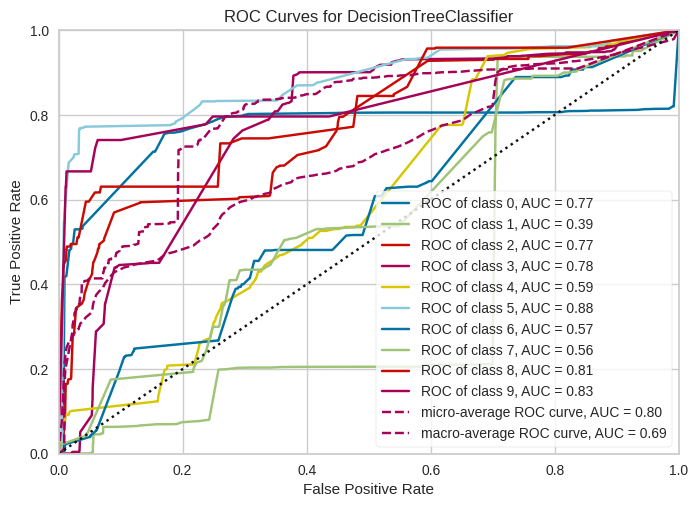

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=DecisionTreeClassifier(max_depth=10))

In [99]:
plot_ROC_curve(dtree1, X_train, y_multi_train_mod5, X_test, y_multi_test)

<ipython-input-100-bdeaaa741129>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train, y_multi_train_mod5)


score on test: 0.5658606576657101
score on train: 0.40900191160285004
              precision    recall  f1-score   support

           0       0.46      1.00      0.63     30685
           1       0.99      0.64      0.78     19493
           2       0.81      0.33      0.47     14798
           3       0.78      0.00      0.01      7903
           4       1.00      0.00      0.00      5312
           5       0.00      0.00      0.00      4653
           6       0.00      0.00      0.00       850
           7       0.00      0.00      0.00       771
           8       0.00      0.00      0.00       509
           9       0.00      0.00      0.00        54

    accuracy                           0.57     85028
   macro avg       0.41      0.20      0.19     85028
weighted avg       0.67      0.57      0.49     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


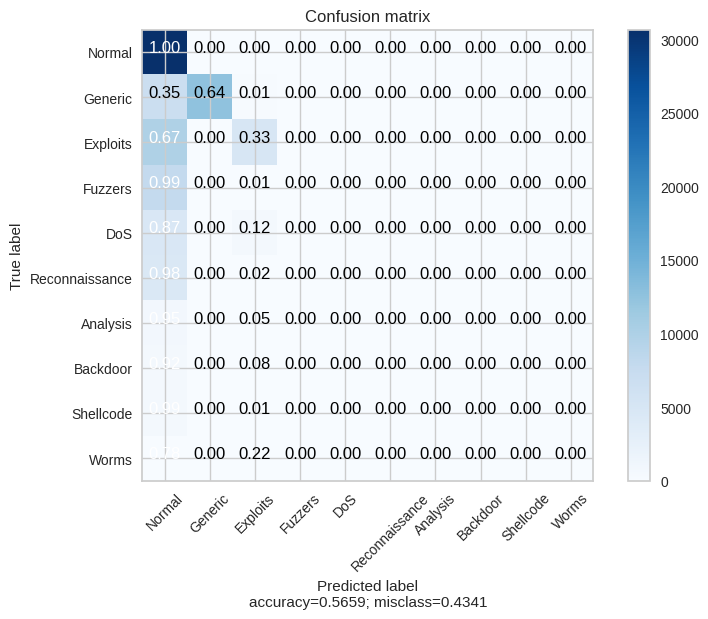

In [100]:
rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train, y_multi_train_mod5)
y_pred = rf2.predict(X_test)
print("score on test: " + str(rf2.score(X_test, y_multi_test)))
print("score on train: "+ str(rf2.score(X_train, y_multi_train_mod5)))
print(metrics.classification_report(y_multi_test, y_pred))
accuracy = rf2.score(X_test, y_multi_test)
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_rf_m['75%']=acc

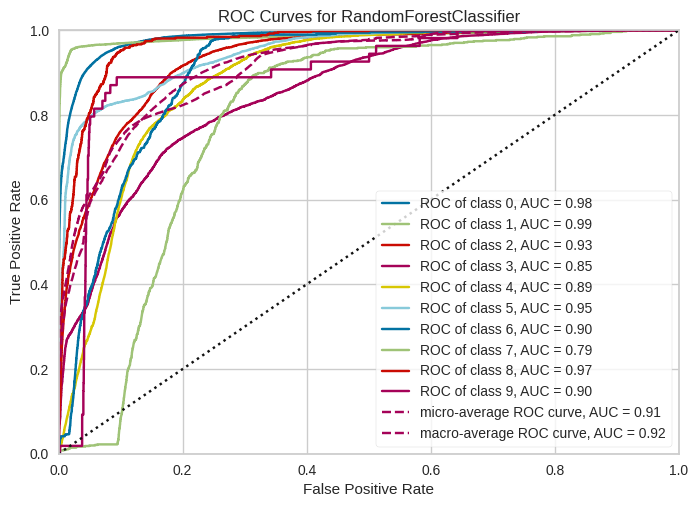

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=RandomForestClassifier(max_depth=10, n_estimators=30))

In [101]:
plot_ROC_curve(rf2, X_train, y_multi_train_mod5, X_test, y_multi_test)

score on test: 0.36569130168885544
score on train: 0.43780918727915197
              precision    recall  f1-score   support

           0       0.34      0.73      0.47     30685
           1       0.18      0.06      0.09     19493
           2       0.59      0.35      0.43     14798
           3       0.76      0.16      0.27      7903
           4       0.09      0.01      0.02      5312
           5       0.91      0.20      0.32      4653
           6       0.36      0.00      0.01       850
           7       0.29      0.03      0.05       771
           8       0.58      0.04      0.08       509
           9       0.00      0.00      0.00        54

    accuracy                           0.37     85028
   macro avg       0.41      0.16      0.17     85028
weighted avg       0.40      0.37      0.31     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


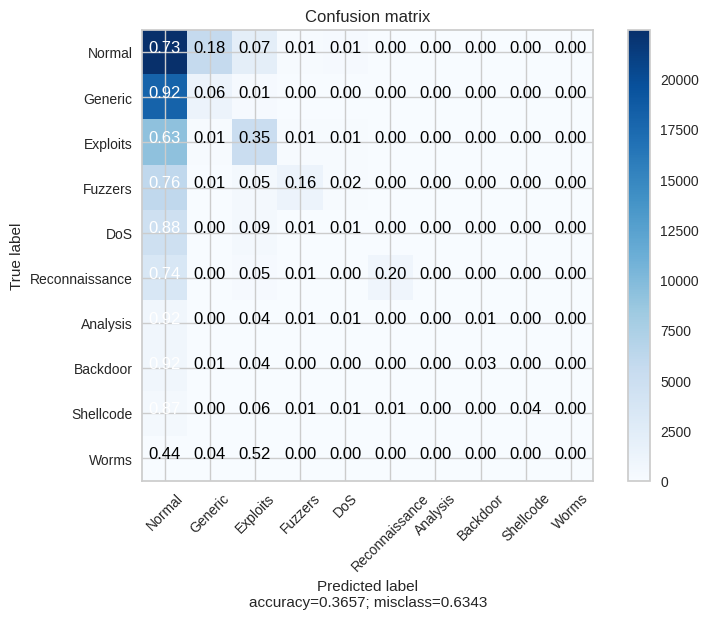

In [102]:
xgb2 = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb2.fit(X_train, y_multi_train_mod5)
y_pred = xgb2.predict(X_test)
print("score on test: " + str(xgb2.score(X_test, y_multi_test)))
print("score on train: "+ str(xgb2.score(X_train, y_multi_train_mod5)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_xgb_m['75%']=acc

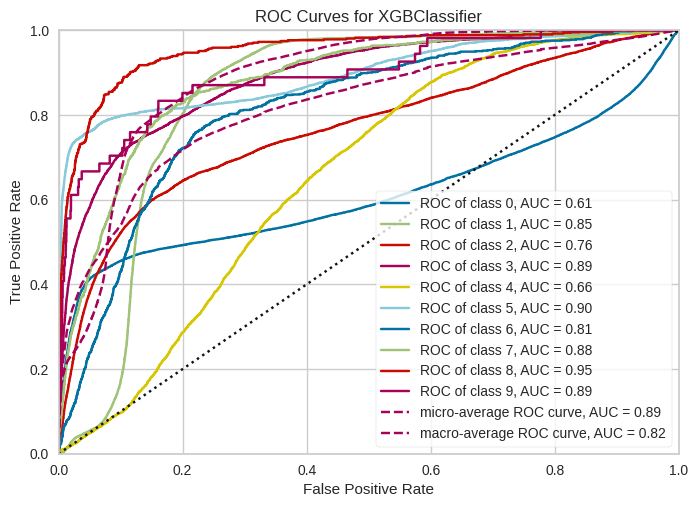

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, g...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))

In [103]:
plot_ROC_curve(xgb2, X_train, y_multi_train_mod5, X_test, y_multi_test)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 128)               5504      
                                                                 
 dense_37 (Dense)            (None, 64)                8256      
                                                                 
 dense_38 (Dense)            (None, 64)                4160      
                                                                 
 dense_39 (Dense)            (None, 10)                650       
                                                                 
Total params: 18,570
Trainable params: 18,570
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1349/1349 [==============================] - 3s 2ms/step - loss: 1.6524 - accuracy: 0.3923
Epoch 2/100
1349/1349 [==============================] - 3s 2ms/step - loss: 1.

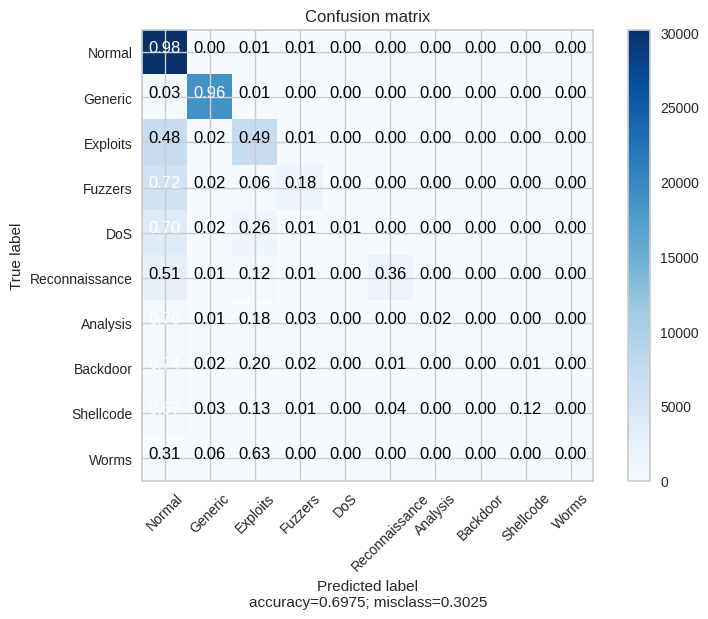

In [104]:
model2 = models.Sequential()
model2.add(layers.Dense(128, input_shape = (42,), activation = "relu"))
model2.add(layers.Dense(64, activation = "relu"))
model2.add(layers.Dense(64,activation="relu"))
model2.add(layers.Dense(10, activation = "softmax"))
model2.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics = ["accuracy"])
model2.summary()

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)

model2.fit(X_train,y_multi_train_mod5,epochs=100,batch_size=128,callbacks=[earlystopping])
y_pred_arr = model2.predict(X_test)
y_pred = np.argmax(y_pred_arr, axis=1)

scores=model2.evaluate(X_test, y_multi_test, verbose=0)
res_nn_m['75%']=scores[1]
print("score on test: " + str(model2.evaluate(X_test,y_multi_test)[1]))
print("score on train: "+ str(model2.evaluate(X_train,y_multi_train_mod5)[1]))
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)

In [105]:
y_true_int = y_multi_test.values.ravel()
y_pred_int = y_pred.copy()
report = metrics.classification_report(y_true_int, y_pred_int)
print(report)

              precision    recall  f1-score   support

           0       0.59      0.98      0.74     30685
           1       0.96      0.96      0.96     19493
           2       0.69      0.49      0.57     14798
           3       0.75      0.18      0.29      7903
           4       0.29      0.01      0.01      5312
           5       0.92      0.36      0.51      4653
           6       0.62      0.02      0.03       850
           7       0.08      0.00      0.00       771
           8       0.52      0.12      0.19       509
           9       0.00      0.00      0.00        54

    accuracy                           0.70     85028
   macro avg       0.54      0.31      0.33     85028
weighted avg       0.70      0.70      0.64     85028



ROC AUC score: 0.881260100138463


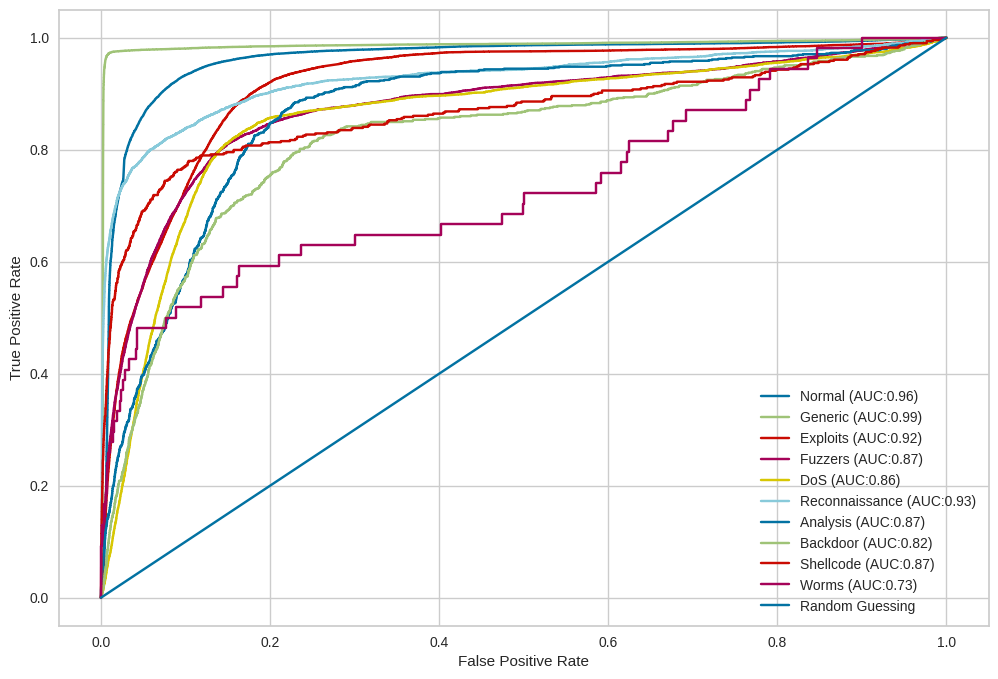

In [106]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
print('ROC AUC score:', multiclass_roc_auc_score(y_multi_test, y_pred_arr))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

90% label flipped

In [107]:
a, b = np.split(y_train, [int(.9*len(y_train))])
a = a.sample(frac=1, random_state=42)
y_train_mod6 = pd.concat([a, b], axis=0)
y_train_mod6

label
68541       0
56392       0
95565       1
13619       1
48821       1
...       ...
172625      0
172626      0
172627      1
172628      1
172629      1

[172630 rows x 1 columns]

In [108]:
a, b = np.split(y_multi_train, [int(.9*len(y_multi_train))])
a = a.sample(frac=1, random_state=42)
y_multi_train_mod6 = pd.concat([a, b], axis=0)
y_multi_train_mod6

attack_cat
68541            0
56392            0
95565            1
13619            1
48821            3
...            ...
172625           0
172626           0
172627           2
172628           1
172629           3

[172630 rows x 1 columns]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score on test: 0.640000940866538
score on train: 0.6389851126687134
              precision    recall  f1-score   support

           0       0.89      0.00      0.01     30685
           1       0.64      1.00      0.78     54343

    accuracy                           0.64     85028
   macro avg       0.77      0.50      0.39     85028
weighted avg       0.73      0.64      0.50     85028



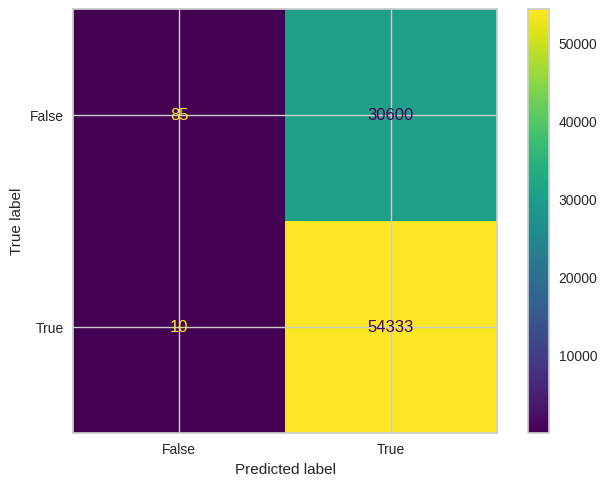

In [109]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)
lr1=LogisticRegression()
lr1.fit(X_train, y_train_mod6)
y_pred = lr1.predict(X_test)
print("score on test: " + str(lr1.score(X_test, y_test)))
print("score on train: "+ str(lr1.score(X_train, y_train_mod6)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_log['90%']=acc

AUC: 0.9591


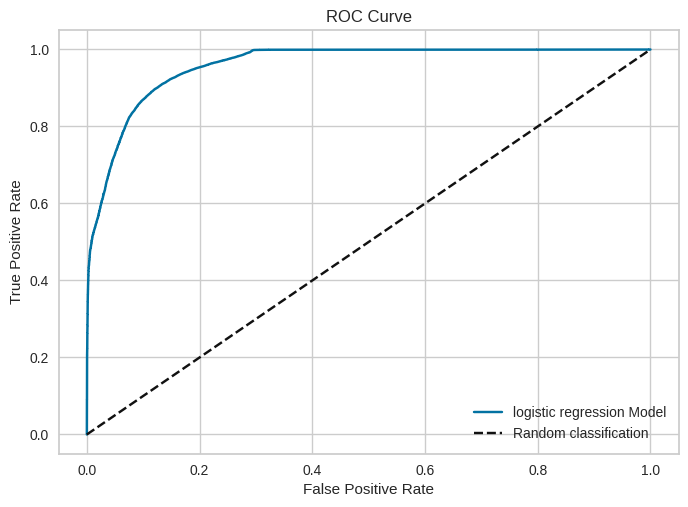

In [110]:
# ROC curve and AUC
lr1_predproba = lr1.predict_proba(X_test)[:, 1]
AUC_lr1 = roc_auc_score(y_test, lr1_predproba)
print(f'AUC: {AUC_lr1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, lr1_predproba)
plt.plot(fpr, tpr, label='logistic regression Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<ipython-input-111-68839a1d7b7e>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train, y_train_mod6)


score on test: 0.708166721550548
score on train: 0.6415223309969299
              precision    recall  f1-score   support

           0       1.00      0.19      0.32     30685
           1       0.69      1.00      0.81     54343

    accuracy                           0.71     85028
   macro avg       0.84      0.60      0.57     85028
weighted avg       0.80      0.71      0.64     85028



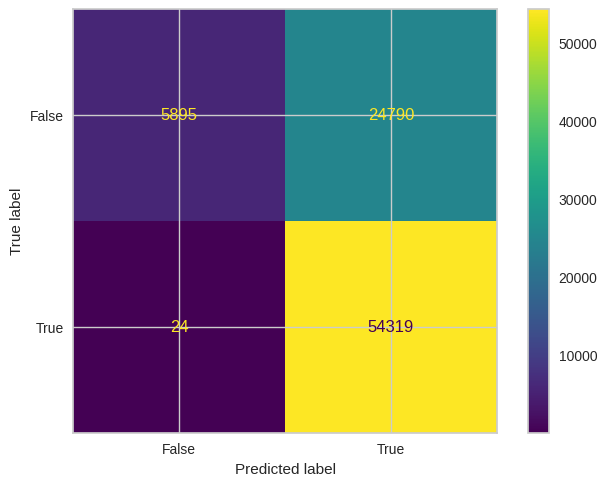

In [111]:
rf1 = RandomForestClassifier(n_estimators=30, max_depth=10)
rf1.fit(X_train, y_train_mod6)
y_pred = rf1.predict(X_test)
print("score on test: " + str(rf1.score(X_test, y_test)))
print("score on train: "+ str(rf1.score(X_train, y_train_mod6)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_rf_b['90%']=acc

AUC: 0.9265


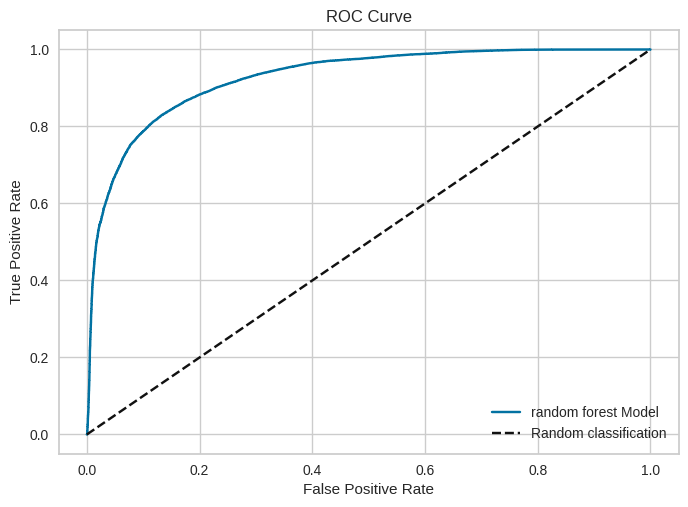

In [112]:
rf1_predproba = rf1.predict_proba(X_test)[:, 1]
AUC_rf1 = roc_auc_score(y_test, rf1_predproba)
print(f'AUC: {AUC_rf1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, rf1_predproba)
plt.plot(fpr, tpr, label='random forest Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

score on test: 0.7502704991296985
score on train: 0.6613914151653826
              precision    recall  f1-score   support

           0       0.67      0.60      0.63     30685
           1       0.79      0.84      0.81     54343

    accuracy                           0.75     85028
   macro avg       0.73      0.72      0.72     85028
weighted avg       0.75      0.75      0.75     85028



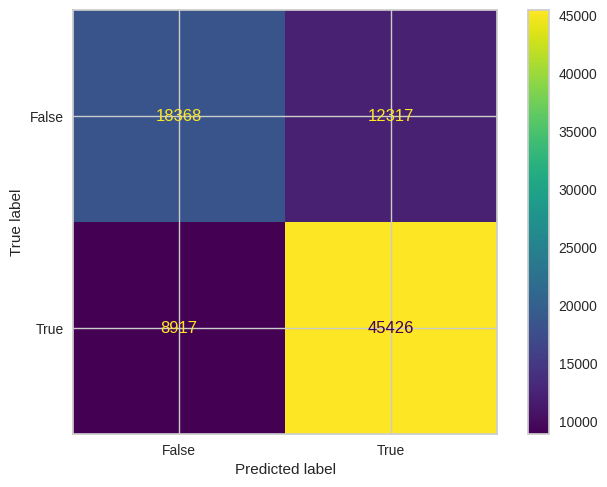

In [113]:
xgb1 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb1.fit(X_train, y_train_mod6)
y_pred = xgb1.predict(X_test)
print("score on test: " + str(xgb1.score(X_test, y_test)))
print("score on train: "+ str(xgb1.score(X_train, y_train_mod6)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_xgb_b['90%']=acc

AUC: 0.7822


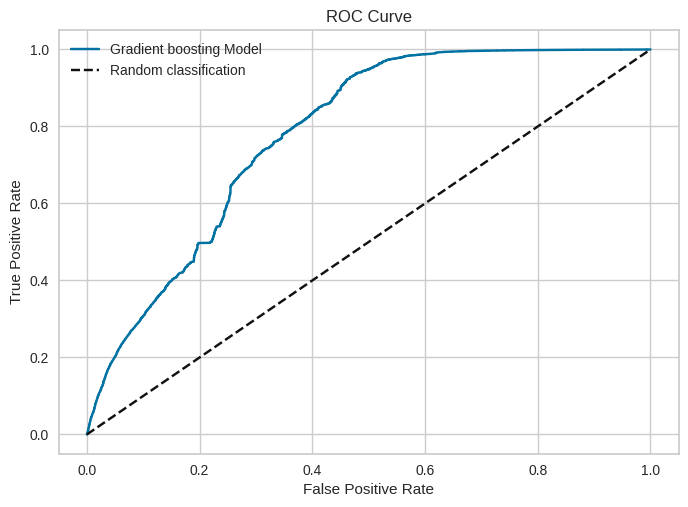

In [114]:
# ROC curve and AUC
xgb1_predproba = xgb1.predict_proba(X_test)[:, 1]
AUC_xgb1 = roc_auc_score(y_test, xgb1_predproba)
print(f'AUC: {AUC_xgb1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, xgb1_predproba)
plt.plot(fpr, tpr, label='Gradient boosting Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Epoch 1/100
1349/1349 [==============================] - 4s 2ms/step - loss: 0.6528 - accuracy: 0.6382
Epoch 2/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.6515 - accuracy: 0.6389
Epoch 3/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.6510 - accuracy: 0.6391
Epoch 4/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.6508 - accuracy: 0.6391
Epoch 5/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.6507 - accuracy: 0.6391
Epoch 6/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.6506 - accuracy: 0.6391
Epoch 7/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.6506 - accuracy: 0.6391
Epoch 8/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.6505 - accuracy: 0.6391
Epoch 9/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.6503 - accuracy: 0.6391
Epoch 10/100
1349/1349 [==============================] - 3s 2ms/step - l

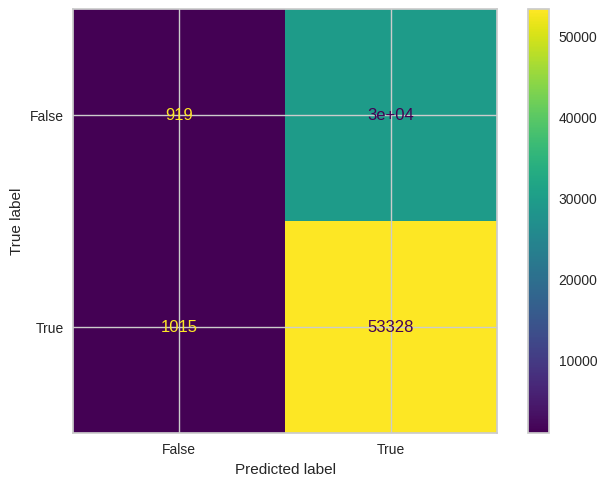

In [115]:
model=models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(42,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)
model.fit(X_train, y_train_mod6, batch_size=128, epochs=100, callbacks=[earlystopping])

y_pred = model.predict(X_test)
print("score on test: " + str(model.evaluate(X_test,y_test)[1]))
print("score on train: "+ str(model.evaluate(X_train,y_train_mod6)[1]))

scores=model.evaluate(X_test, y_test, verbose=0)
res_nn_b['90%']=scores[1]
from sklearn import metrics
y_pred_mat = y_pred.round()
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [116]:
y_true_int = y_test.values.ravel()
y_pred_int = y_pred.round().ravel().astype('int')
report = metrics.classification_report(y_true_int, y_pred_int)
print(report)

              precision    recall  f1-score   support

           0       0.48      0.03      0.06     30685
           1       0.64      0.98      0.78     54343

    accuracy                           0.64     85028
   macro avg       0.56      0.51      0.42     85028
weighted avg       0.58      0.64      0.52     85028



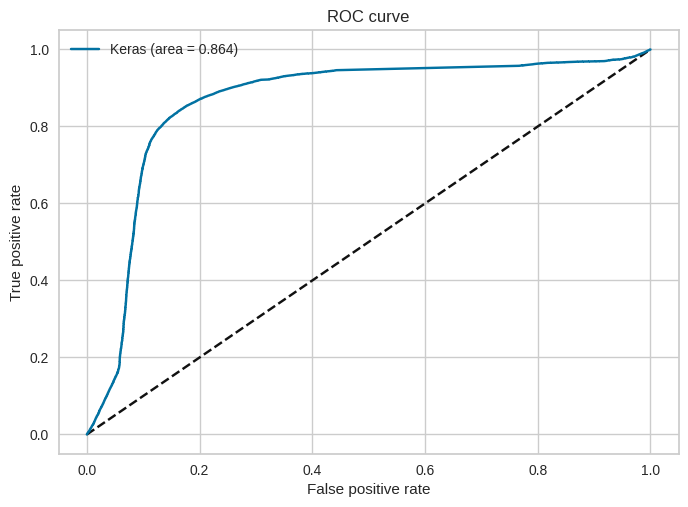

In [117]:
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

score on test: 0.4087829891329915
score on train: 0.36750854428546603
              precision    recall  f1-score   support

           0       0.42      0.90      0.57     30685
           1       0.79      0.33      0.47     19493
           2       0.05      0.03      0.04     14798
           3       0.25      0.01      0.02      7903
           4       0.00      0.00      0.00      5312
           5       0.00      0.00      0.00      4653
           6       0.00      0.00      0.00       850
           7       0.00      0.00      0.00       771
           8       0.00      0.00      0.00       509
           9       0.00      0.00      0.00        54

    accuracy                           0.41     85028
   macro avg       0.15      0.13      0.11     85028
weighted avg       0.37      0.41      0.32     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


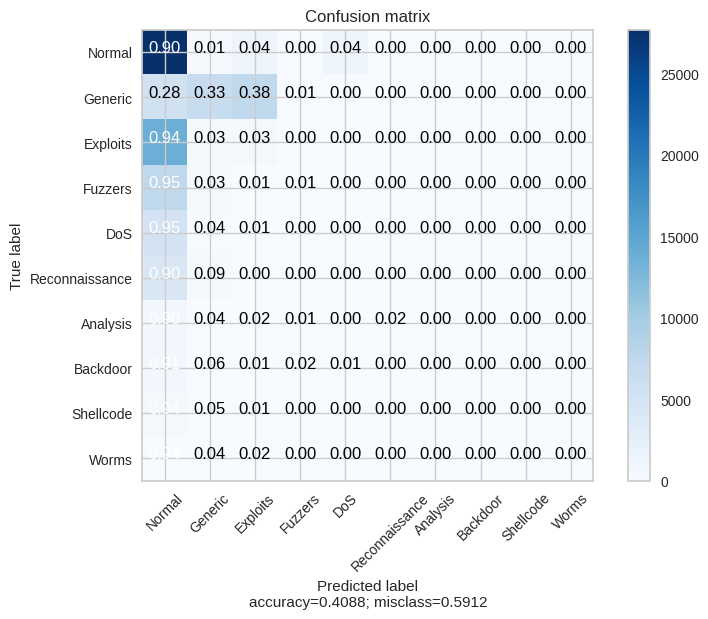

In [118]:
dtree1 = DecisionTreeClassifier(max_depth = 10).fit(X_train, y_multi_train_mod6)
y_pred = dtree1.predict(X_test)
print("score on test: " + str(dtree1.score(X_test, y_multi_test)))
print("score on train: "+ str(dtree1.score(X_train, y_multi_train_mod6)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_tree['90%']=acc

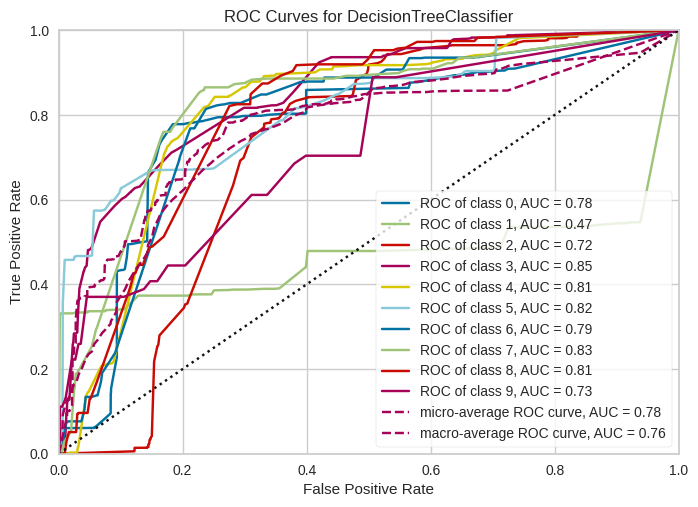

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=DecisionTreeClassifier(max_depth=10))

In [119]:
plot_ROC_curve(dtree1, X_train, y_multi_train_mod6, X_test, y_multi_test)

<ipython-input-120-221a02f4d844>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train, y_multi_train_mod6)


score on test: 0.37412381803641154
score on train: 0.36869605514684584
              precision    recall  f1-score   support

           0       0.37      1.00      0.54     30685
           1       0.89      0.03      0.06     19493
           2       0.80      0.04      0.08     14798
           3       0.78      0.00      0.00      7903
           4       1.00      0.00      0.00      5312
           5       0.00      0.00      0.00      4653
           6       0.00      0.00      0.00       850
           7       0.00      0.00      0.00       771
           8       0.00      0.00      0.00       509
           9       0.00      0.00      0.00        54

    accuracy                           0.37     85028
   macro avg       0.38      0.11      0.07     85028
weighted avg       0.61      0.37      0.22     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


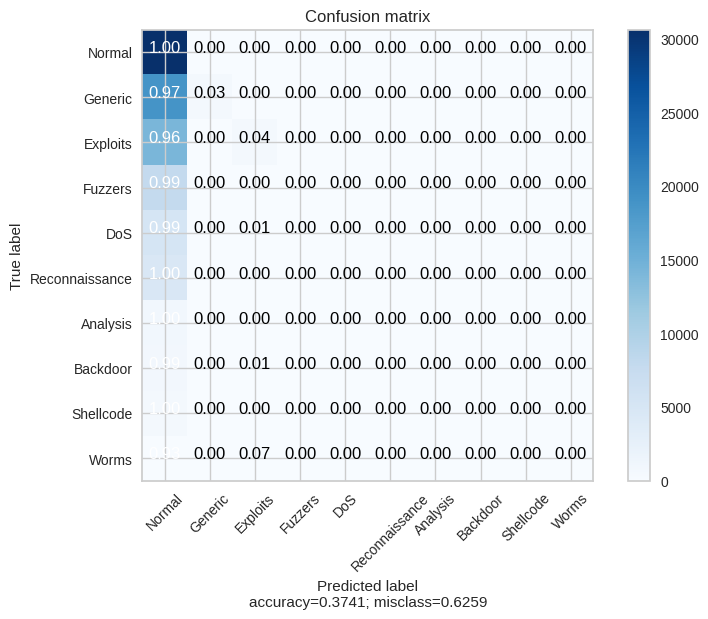

In [120]:
rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train, y_multi_train_mod6)
y_pred = rf2.predict(X_test)
print("score on test: " + str(rf2.score(X_test, y_multi_test)))
print("score on train: "+ str(rf2.score(X_train, y_multi_train_mod6)))
print(metrics.classification_report(y_multi_test, y_pred))
accuracy = rf2.score(X_test, y_multi_test)
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_rf_m['90%']=acc

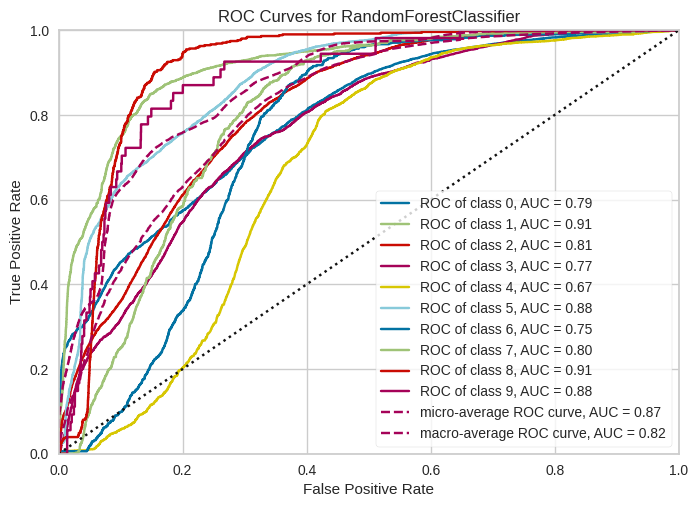

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=RandomForestClassifier(max_depth=10, n_estimators=30))

In [121]:
plot_ROC_curve(rf2, X_train, y_multi_train_mod6, X_test, y_multi_test)

score on test: 0.3766171143623277
score on train: 0.3941319585240109
              precision    recall  f1-score   support

           0       0.38      0.92      0.53     30685
           1       0.12      0.01      0.02     19493
           2       0.61      0.22      0.33     14798
           3       0.51      0.02      0.04      7903
           4       0.03      0.00      0.01      5312
           5       0.12      0.05      0.07      4653
           6       0.14      0.00      0.00       850
           7       0.00      0.00      0.00       771
           8       0.00      0.00      0.00       509
           9       0.00      0.00      0.00        54

    accuracy                           0.38     85028
   macro avg       0.19      0.12      0.10     85028
weighted avg       0.32      0.38      0.26     85028



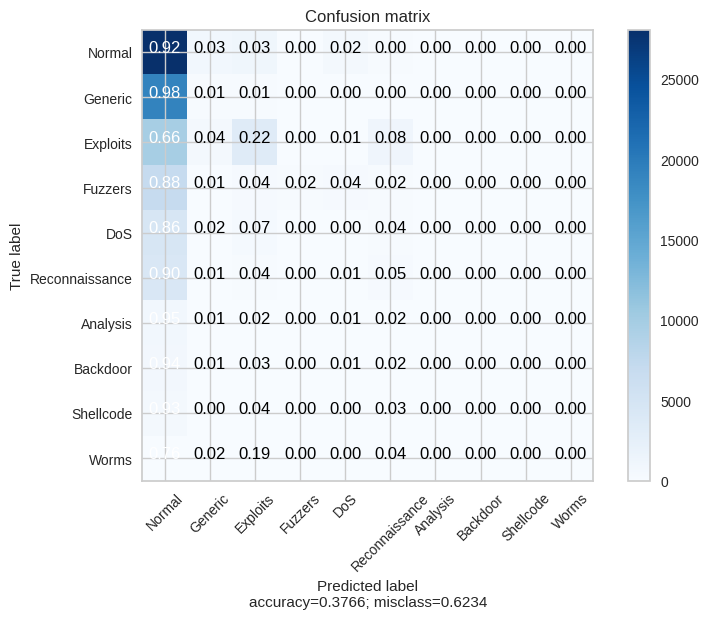

In [122]:
xgb2 = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb2.fit(X_train, y_multi_train_mod6)
y_pred = xgb2.predict(X_test)
print("score on test: " + str(xgb2.score(X_test, y_multi_test)))
print("score on train: "+ str(xgb2.score(X_train, y_multi_train_mod6)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_xgb_m['90%']=acc

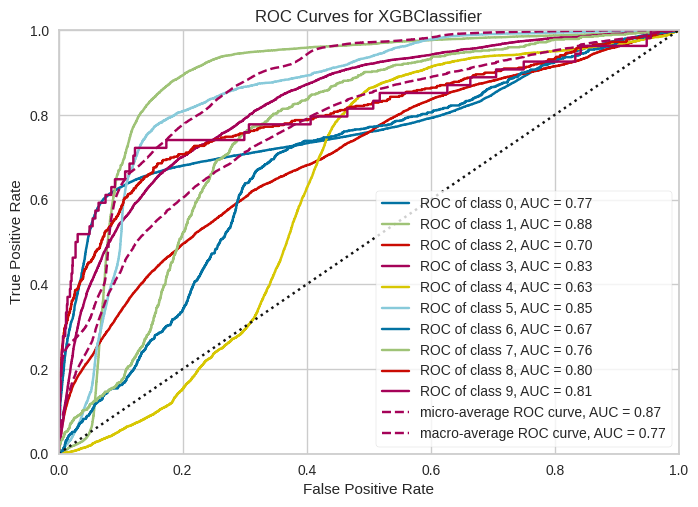

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, g...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))

In [123]:
plot_ROC_curve(xgb2, X_train, y_multi_train_mod6, X_test, y_multi_test)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 128)               5504      
                                                                 
 dense_45 (Dense)            (None, 64)                8256      
                                                                 
 dense_46 (Dense)            (None, 64)                4160      
                                                                 
 dense_47 (Dense)            (None, 10)                650       
                                                                 
Total params: 18,570
Trainable params: 18,570
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1349/1349 [==============================] - 3s 2ms/step - loss: 1.6972 - accuracy: 0.3582
Epoch 2/100
1349/1349 [==============================] - 3s 2ms/step - loss: 1

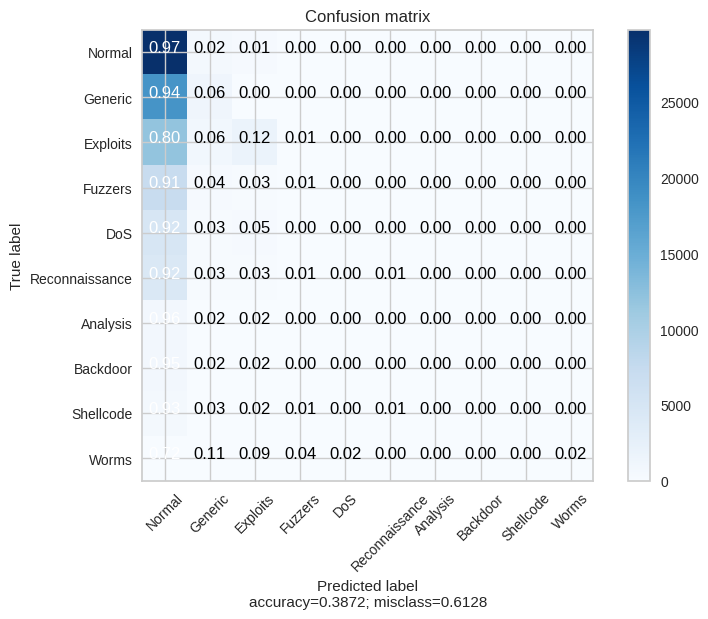

In [124]:
model2 = models.Sequential()
model2.add(layers.Dense(128, input_shape = (42,), activation = "relu"))
model2.add(layers.Dense(64, activation = "relu"))
model2.add(layers.Dense(64,activation="relu"))
model2.add(layers.Dense(10, activation = "softmax"))
model2.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics = ["accuracy"])
model2.summary()

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)

model2.fit(X_train,y_multi_train_mod6,epochs=100,batch_size=128,callbacks=[earlystopping])
y_pred_arr = model2.predict(X_test)
y_pred = np.argmax(y_pred_arr, axis=1)

scores=model2.evaluate(X_test, y_multi_test, verbose=0)
res_nn_m['90%']=scores[1]
print("score on test: " + str(model2.evaluate(X_test,y_multi_test)[1]))
print("score on train: "+ str(model2.evaluate(X_train,y_multi_train_mod6)[1]))
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)

In [125]:
y_true_int = y_multi_test.values.ravel()
y_pred_int = y_pred.copy()
report = metrics.classification_report(y_true_int, y_pred_int)
print(report)

              precision    recall  f1-score   support

           0       0.38      0.97      0.55     30685
           1       0.36      0.06      0.10     19493
           2       0.64      0.12      0.20     14798
           3       0.32      0.01      0.03      7903
           4       0.11      0.00      0.01      5312
           5       0.33      0.01      0.02      4653
           6       0.00      0.00      0.00       850
           7       0.09      0.00      0.01       771
           8       0.00      0.00      0.00       509
           9       0.25      0.02      0.03        54

    accuracy                           0.39     85028
   macro avg       0.25      0.12      0.09     85028
weighted avg       0.39      0.39      0.26     85028



ROC AUC score: 0.777410352072536


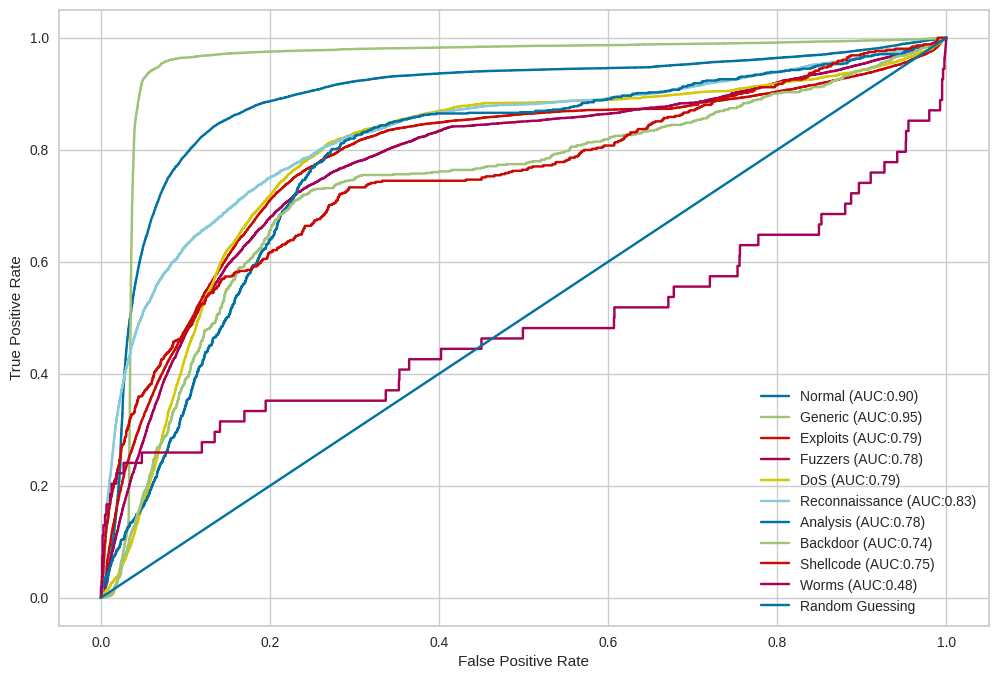

In [126]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
print('ROC AUC score:', multiclass_roc_auc_score(y_multi_test, y_pred_arr))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

Accuracies plots

In [127]:
import plotly.express as px
levels = list(res_log.keys())
accuracies = list(res_log.values())
finalplot=px.scatter(x=levels,y=accuracies,title='Accuracy levels in the logistic regression')
finalplot.update_layout(xaxis_tickangle=0, xaxis_title = 'Portion of labels flipped',yaxis_title='Accuracy (%)')
finalplot.update_layout(uniformtext_minsize=0)
finalplot.show()

In [128]:
levels = list(res_rf_b.keys())
accuracies = list(res_rf_b.values())
finalplot=px.scatter(x=levels,y=accuracies,title='Accuracy levels in the random forest for binary task')
finalplot.update_layout(xaxis_tickangle=0, xaxis_title = 'Portion of labels flipped',yaxis_title='Accuracy (%)')
finalplot.update_layout(uniformtext_minsize=0)
finalplot.show()

In [129]:
levels = list(res_xgb_b.keys())
accuracies = list(res_xgb_b.values())
finalplot=px.scatter(x=levels,y=accuracies,title='Accuracy levels in the gradient boosting for binary task')
finalplot.update_layout(xaxis_tickangle=0, xaxis_title = 'Portion of labels flipped',yaxis_title='Accuracy (%)')
finalplot.update_layout(uniformtext_minsize=0)
finalplot.show()

In [130]:
levels = list(res_nn_b.keys())
accuracies = list(res_nn_b.values())
finalplot=px.scatter(x=levels,y=accuracies,title='Accuracy levels in the neural network for binary task')
finalplot.update_layout(xaxis_tickangle=0, xaxis_title = 'Portion of labels flipped',yaxis_title='Accuracy (%)')
finalplot.update_layout(uniformtext_minsize=0)
finalplot.show()

In [131]:
levels = list(res_tree.keys())
accuracies = list(res_tree.values())
finalplot=px.scatter(x=levels,y=accuracies,title='Accuracy levels in the decision tree')
finalplot.update_layout(xaxis_tickangle=0, xaxis_title = 'Portion of labels flipped',yaxis_title='Accuracy (%)')
finalplot.update_layout(uniformtext_minsize=0)
finalplot.show()

In [132]:
levels = list(res_rf_m.keys())
accuracies = list(res_rf_m.values())
finalplot=px.scatter(x=levels,y=accuracies,title='Accuracy levels in the random forest for multiclass task')
finalplot.update_layout(xaxis_tickangle=0, xaxis_title = 'Portion of labels flipped',yaxis_title='Accuracy (%)')
finalplot.update_layout(uniformtext_minsize=0)
finalplot.show()

In [133]:
levels = list(res_xgb_m.keys())
accuracies = list(res_xgb_m.values())
finalplot=px.scatter(x=levels,y=accuracies,title='Accuracy levels in the gradient boosting for multiclass task')
finalplot.update_layout(xaxis_tickangle=0, xaxis_title = 'Portion of labels flipped',yaxis_title='Accuracy (%)')
finalplot.update_layout(uniformtext_minsize=0)
finalplot.show()

In [134]:
levels = list(res_nn_m.keys())
accuracies = list(res_nn_m.values())
finalplot=px.scatter(x=levels,y=accuracies,title='Accuracy levels in the neural network for multiclass task')
finalplot.update_layout(xaxis_tickangle=0, xaxis_title = 'Portion of labels flipped',yaxis_title='Accuracy (%)')
finalplot.update_layout(uniformtext_minsize=0)
finalplot.show()